# 1 EDA

#### 1.1 Importando as bibliotecas

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split,cross_validate,HalvingRandomSearchCV,HalvingGridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn import set_config
from sklearn.impute import SimpleImputer

sns.set()

#### 1.2 Lendo os arquivos

In [156]:
test_full = pd.read_csv('test.csv')
train_full = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)

train_full.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Temos um volume bem elevado de colunas

#### 1.3 Analisando o tipo de cada uma das variáveis

In [157]:
#Já droparemos a coluna ID porque ela é somente uma repetição do index
train_full.drop(columns='Id',inplace=True)
test_full.drop(columns='Id',inplace=True)

train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [158]:
train_full.shape

(1460, 80)

O Dataset possui 80 colunas e 1460 linhas contendo várias colunas categórias e várias colunas numéricas

#### 1.4 Tratando os dados missing

In [159]:
#criando uma máscara para ver onde temos valores nulos > 0
mask = train_full.isnull().sum() > 0
mask_2 = test_full.isnull().sum() > 0


train_full.isnull().mean() [mask]

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

As colunas "Alley", 'PoolQC', e 'MiscFeature' tem % de missing de 90% e em função disso serão dropadas

In [160]:
train_full = train_full.drop(columns=['Alley','PoolQC','MiscFeature'])
test_full = test_full.drop(columns=['Alley','PoolQC','MiscFeature'])


display(train_full.isnull().mean()[mask]) 

LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
Fence           0.807534
dtype: float64

Das features que tem um volume expressivo de NA, algumas tem descrito na documentação que NA = ausência da feature, sendo elas: 
- 'Fence'
- 'GarageCond'
- 'GarageQual'
- 'GarageFinish'
- 'GarageType'
- 'FireplaceQu'
- 'BsmtFinType2'
- 'BsmtFinType1'
- 'BsmtExposure'
- 'BsmtCond'
-'BsmtQual',

Essas features serão substituídas por "Dont have it" já que são todas categórias

In [161]:
fillna_columns = ['Fence','GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual']

#dicionário para fazermos um fillna de todas as colunas ao mesmo tempo
fillna_columns = {col: "Don't have it" for col in fillna_columns }

train_full.fillna(value=fillna_columns,inplace=True)
test_full.fillna(value=fillna_columns,inplace=True)

display(train_full.isnull().sum()[mask]) 


LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Electrical        1
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageQual        0
GarageCond        0
Fence             0
dtype: int64

As únicas feature com NA relevantes agora é LotFrontage e GarageYrBlt

In [162]:
train_full.loc[train_full['LotFrontage'].isnull(),:]['LotShape'].value_counts(normalize=True)

IR1    0.644788
Reg    0.285714
IR2    0.057915
IR3    0.011583
Name: LotShape, dtype: float64

Percebemos que as casas que tem NA na feature LotFrontage tem tamanho irregular na sua maioria e em função disso provavelmente não tem Frontage e com isso iremos colocar zero nos NA

In [163]:
train_full.fillna(value={'LotFrontage':0},inplace=True)
test_full.fillna(value={'LotFrontage':0},inplace=True)

# O restante dos dados missing iremos dropar porque tem uma relevância muito pequena em relação ao tamanho da amostra

train_full.dropna(inplace=True)
test_full.dropna(inplace=True)

display(train_full.isnull().sum().sum()) 


0

#### 1.5 Olhando principais métricas de cada coluna

In [164]:
train_full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000,1370.000000
mean,56.054745,57.768613,10687.435036,6.181752,5.582482,1972.783942,1985.327007,109.076642,454.211679,48.418248,570.742336,1073.372263,1176.086131,353.202190,4.162044,1533.450365,0.429197,0.059124,1.577372,0.394161,2.865693,1.037956,6.551825,0.641606,1978.353285,1.869343,500.462774,97.656204,47.028467,21.031387,3.633577,16.050365,2.940146,43.170803,6.331387,2007.811679,185194.797080
std,41.073531,35.031757,10228.507006,1.344236,1.081480,29.371056,20.452934,184.589326,458.985739,164.817484,444.050989,435.558797,385.381717,439.497524,40.260837,519.489200,0.513963,0.239019,0.547455,0.502116,0.782985,0.194944,1.590884,0.644711,24.685798,0.631307,185.988074,126.805998,64.995049,60.519492,30.252215,57.422820,41.470515,503.247977,2.693166,1.331589,78899.705642
min,20.000000,0.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,42.000000,7731.000000,5.000000,5.000000,1955.000000,1967.250000,0.000000,0.000000,0.000000,225.500000,808.500000,894.000000,0.000000,0.000000,1152.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,377.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,133925.000000
50%,50.000000,64.000000,9591.000000,6.000000,5.000000,1975.000000,1994.000000,0.000000,399.500000,0.000000,477.500000,1008.000000,1098.000000,0.000000,0.000000,1479.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.500000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167000.000000
75%,70.000000,79.000000,11712.750000,7.000000,6.000000,2001.000000,2004.000000,171.750000,728.000000,0.000000,811.000000,1314.000000,1414.000000,737.000000,0.000000,1788.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,582.750000,171.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217875.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


A partir dos dados acima podemos gerar algumas hipoteses e conclusões:

- A maior parte das casas tem qualidade mediana dos materiais usados e qualidade mediana para ruim do estado atual, então o preço médio provavelmente não será muito elevado
- As casas tem a maior massa de dados de data de criação entre 1955 e 2001 e temos alguns outliers como o mínimo que é 1880 a data de criação. Isso pode explicar a qualidade atual mediana para ruim das casas, já que são mais velhas. A casa mais recente é de 2010, então são casas relativamente recentes
- Na média as casas são remodeladas a cada 12 anos
- A maioria das casas tem 10% da área destinada ao porão e somente 50% do porão construído. Isso pode gerar uma desvalorização da casa e contribuir para o estado atual ruim
- Curioso que as garagens são construídas 6 anos após a casa
- O ano médio em que as casas foram vendidas é 2007, então normalmente foram vendidas 30 anos após a criação
- O preço médio é de 185 mil dólares a maioria dos dados está entre 133 mil e 2,1 mil. Podemos ver que temos outliers acima do q3 já que a casa mais cara custa 7,5 mi

#### 1.6 Analisando a variável target e as features

Vies:  1.9353698091209877


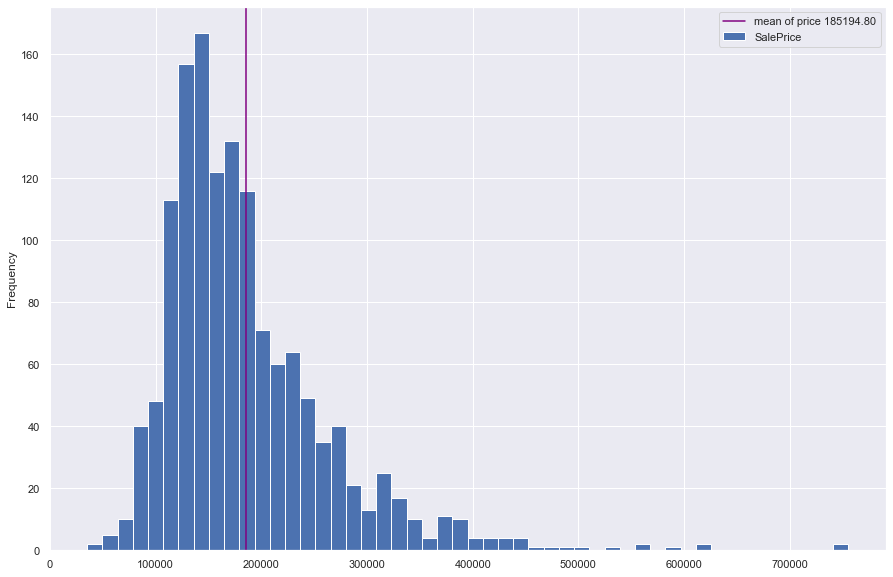

In [165]:
train_full.SalePrice.plot(kind='hist',figsize=(15,10),bins=50)
plt.axvline(train_full.SalePrice.mean(),label=f'mean of price {train_full.SalePrice.mean():.2f}',color='purple')
print('Vies: ',train_full.SalePrice.skew())
plt.legend();

Os preços das casas estão concentrados entre 100 e 200 mil dolares. A variável  tem um víes positivo

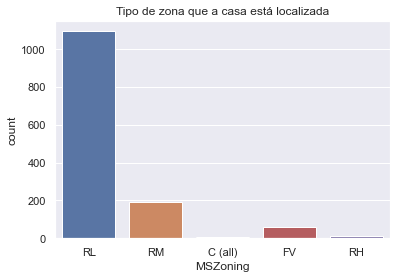

In [166]:
sns.countplot(data=train_full,x='MSZoning')
plt.title('Tipo de zona que a casa está localizada');

A maior das casas está localizada em regiões de baixa densidade populacional (RL)

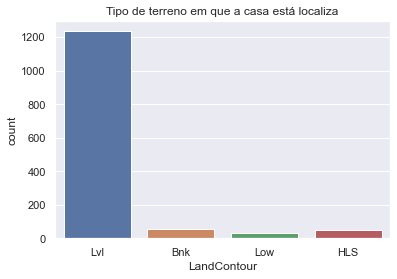

In [167]:
sns.countplot(data=train_full,x='LandContour')
plt.title('Tipo de terreno em que a casa está localiza');

A maior parte das casas está em terenos planos, o que casa bem com as regiões de baixa densidade populacional, provavelmente localizadas em bairros mais isolados do centro da cidade

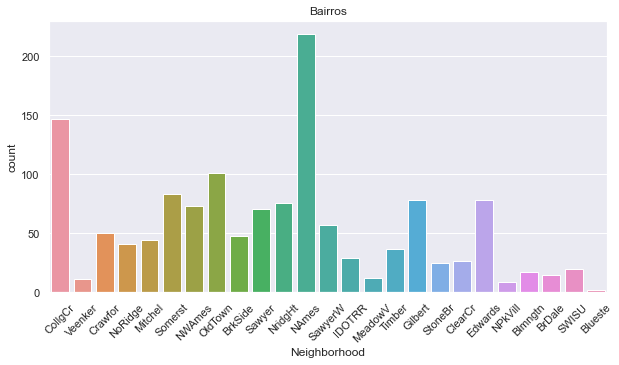

In [168]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_full,x='Neighborhood')
plt.xticks(rotation=45);
plt.title('Bairros');

O bairro com maior volume de casas vendidas é o "North Ames"

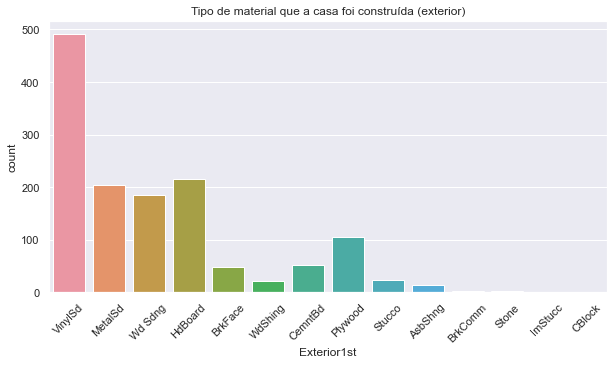

In [169]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_full,x='Exterior1st')
plt.xticks(rotation=45);
plt.title('Tipo de material que a casa foi construída (exterior)');

A maioria das casas é do material vinyl siding que é um material de baixo custo e elevada durabilidade

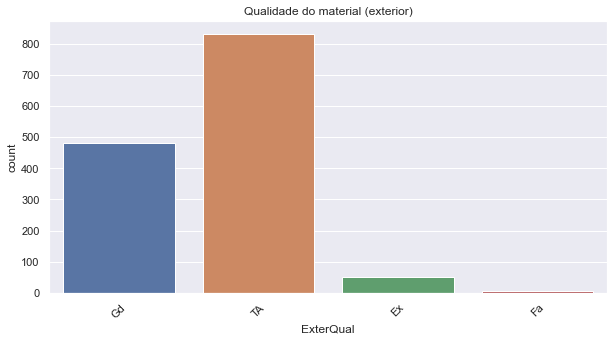

In [170]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_full,x='ExterQual')
plt.xticks(rotation=45);
plt.title('Qualidade do material (exterior)');

Conforme comprovado pela nota da casa o exterior tem um material com qualidade mediana ou típica

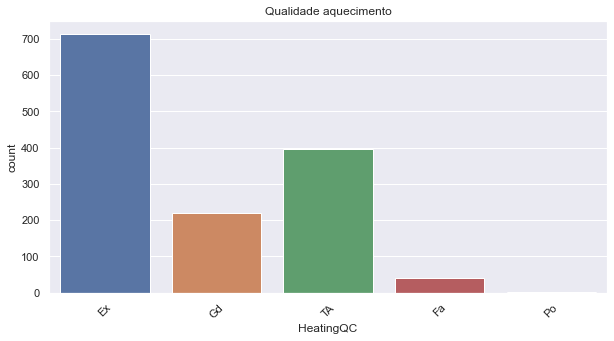

In [171]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_full,x='HeatingQC')
plt.xticks(rotation=45);
plt.title('Qualidade aquecimento');

Como Iowa é bem frio no inverno é importante que as casas tenho uma excelente qualidade de aquecimento

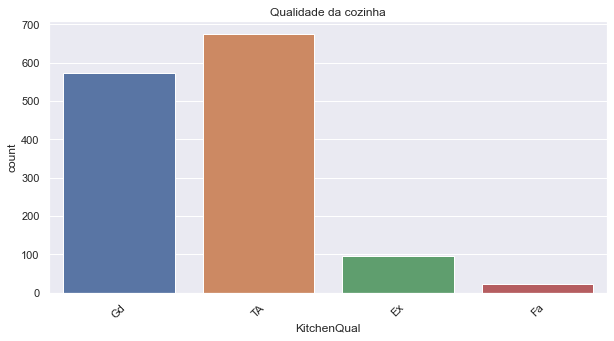

In [172]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_full,x='KitchenQual')
plt.xticks(rotation=45);
plt.title('Qualidade da cozinha');

Novamente vemos a maior parte com qualidade mediana, confirmando o que vimos numericamente sobre a qualidade geral das casas.

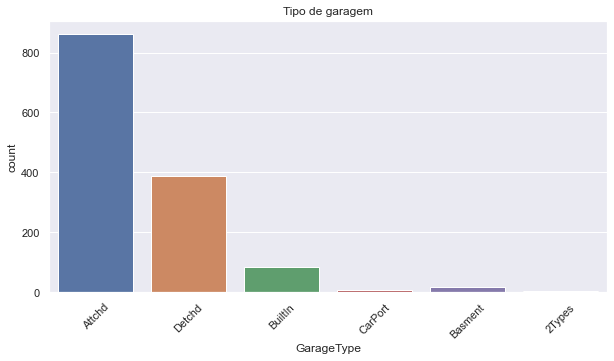

In [173]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_full,x='GarageType')
plt.xticks(rotation=45);
plt.title('Tipo de garagem');

Agora faz sentido a maioria das garagens serem construídas 6 anos após as casas ficarem prontas, a maioria são garagens acopladas a casa

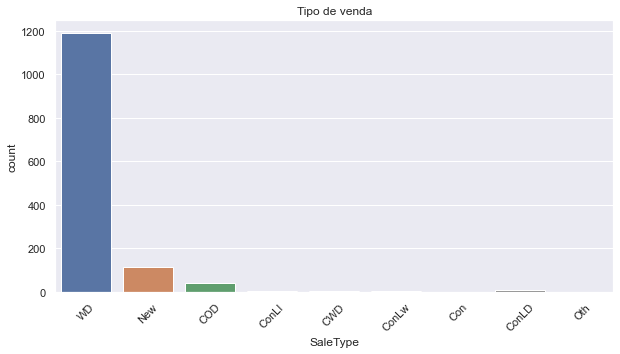

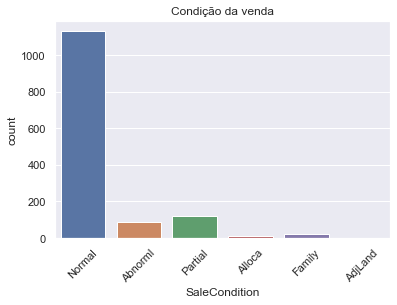

In [174]:
plt.figure(figsize=(10,5))
sns.countplot(data=train_full,x='SaleType')
plt.xticks(rotation=45);
plt.title('Tipo de venda')
plt.show()

sns.countplot(data=train_full, x= 'SaleCondition')
plt.xticks(rotation=45);
plt.title('Condição da venda');


A maior parte das casas foi vendida de forma convencional e com condição normal de venda

Já temos um bom panorama do dataset

#### 1.7 Separando as colunas em númericas e categóricas

In [175]:
num_cols = train_full.select_dtypes('number').columns.to_list()

#Aqui pegaremos as colunas do tipo 'object', porém apenas as de baixa cardinalidade (10 ou menos valores únicos)
object_cols = [col for col in  train_full.select_dtypes('object').columns if train_full[col].nunique() <10]


Vamos plotar o histograma do preço e usar cada feature categorica como o hue para ver quais features separarão melhor o preço

In [176]:
def plot_hist_box(cols,graph='hist',hue=False):
    '''Função para o plot do histograma ou o boxplot de cada feature.
    Se existir hue ele plota o histograma ou o boxplot de preço e cada feature categórica como um separador.
    Se não existir hue ele plot o histograma ou o boxplot de cada feature numérica
    
    cols -> colunas que serão plotadas
    graph -> tipo de gráfico (hist para histograma e qualquer outro nome para boxplot)
    hue -> True ele usa as colunas como separador da variavel SalePrice e False ele só plota os gráficos de cada uma das variáveis cols
    
    '''

    rows = len(cols)//3

    fig,ax = plt.subplots(rows,3,figsize=(30,28))
    ax = ax.ravel()

    if hue:
        if graph == 'hist':
            for chart,col in zip(ax,cols):
                s= sns.histplot(data=train_full,x='SalePrice',ax=chart,hue=col)
                s.set_xlabel('SalePrice')
                s.set_ylabel('count')
        else:
            for chart,col in zip(ax,cols):
                s= sns.boxplot(data=train_full,x='SalePrice',ax=chart,hue=col)
                
    
    else:
        if graph == 'hist':
            for chart,col in zip(ax,cols):
                s= sns.histplot(data=train_full,x=col,ax=chart,label=col)
                s.set_xlabel(col)
                s.set_ylabel('count')
                s.legend()
        else:
            for chart,col in zip(ax,cols):
                s= sns.boxplot(data=train_full,x=col,ax=chart)
               

#### 1.8 Análise gráfica das variáveis categóricas e numéricas

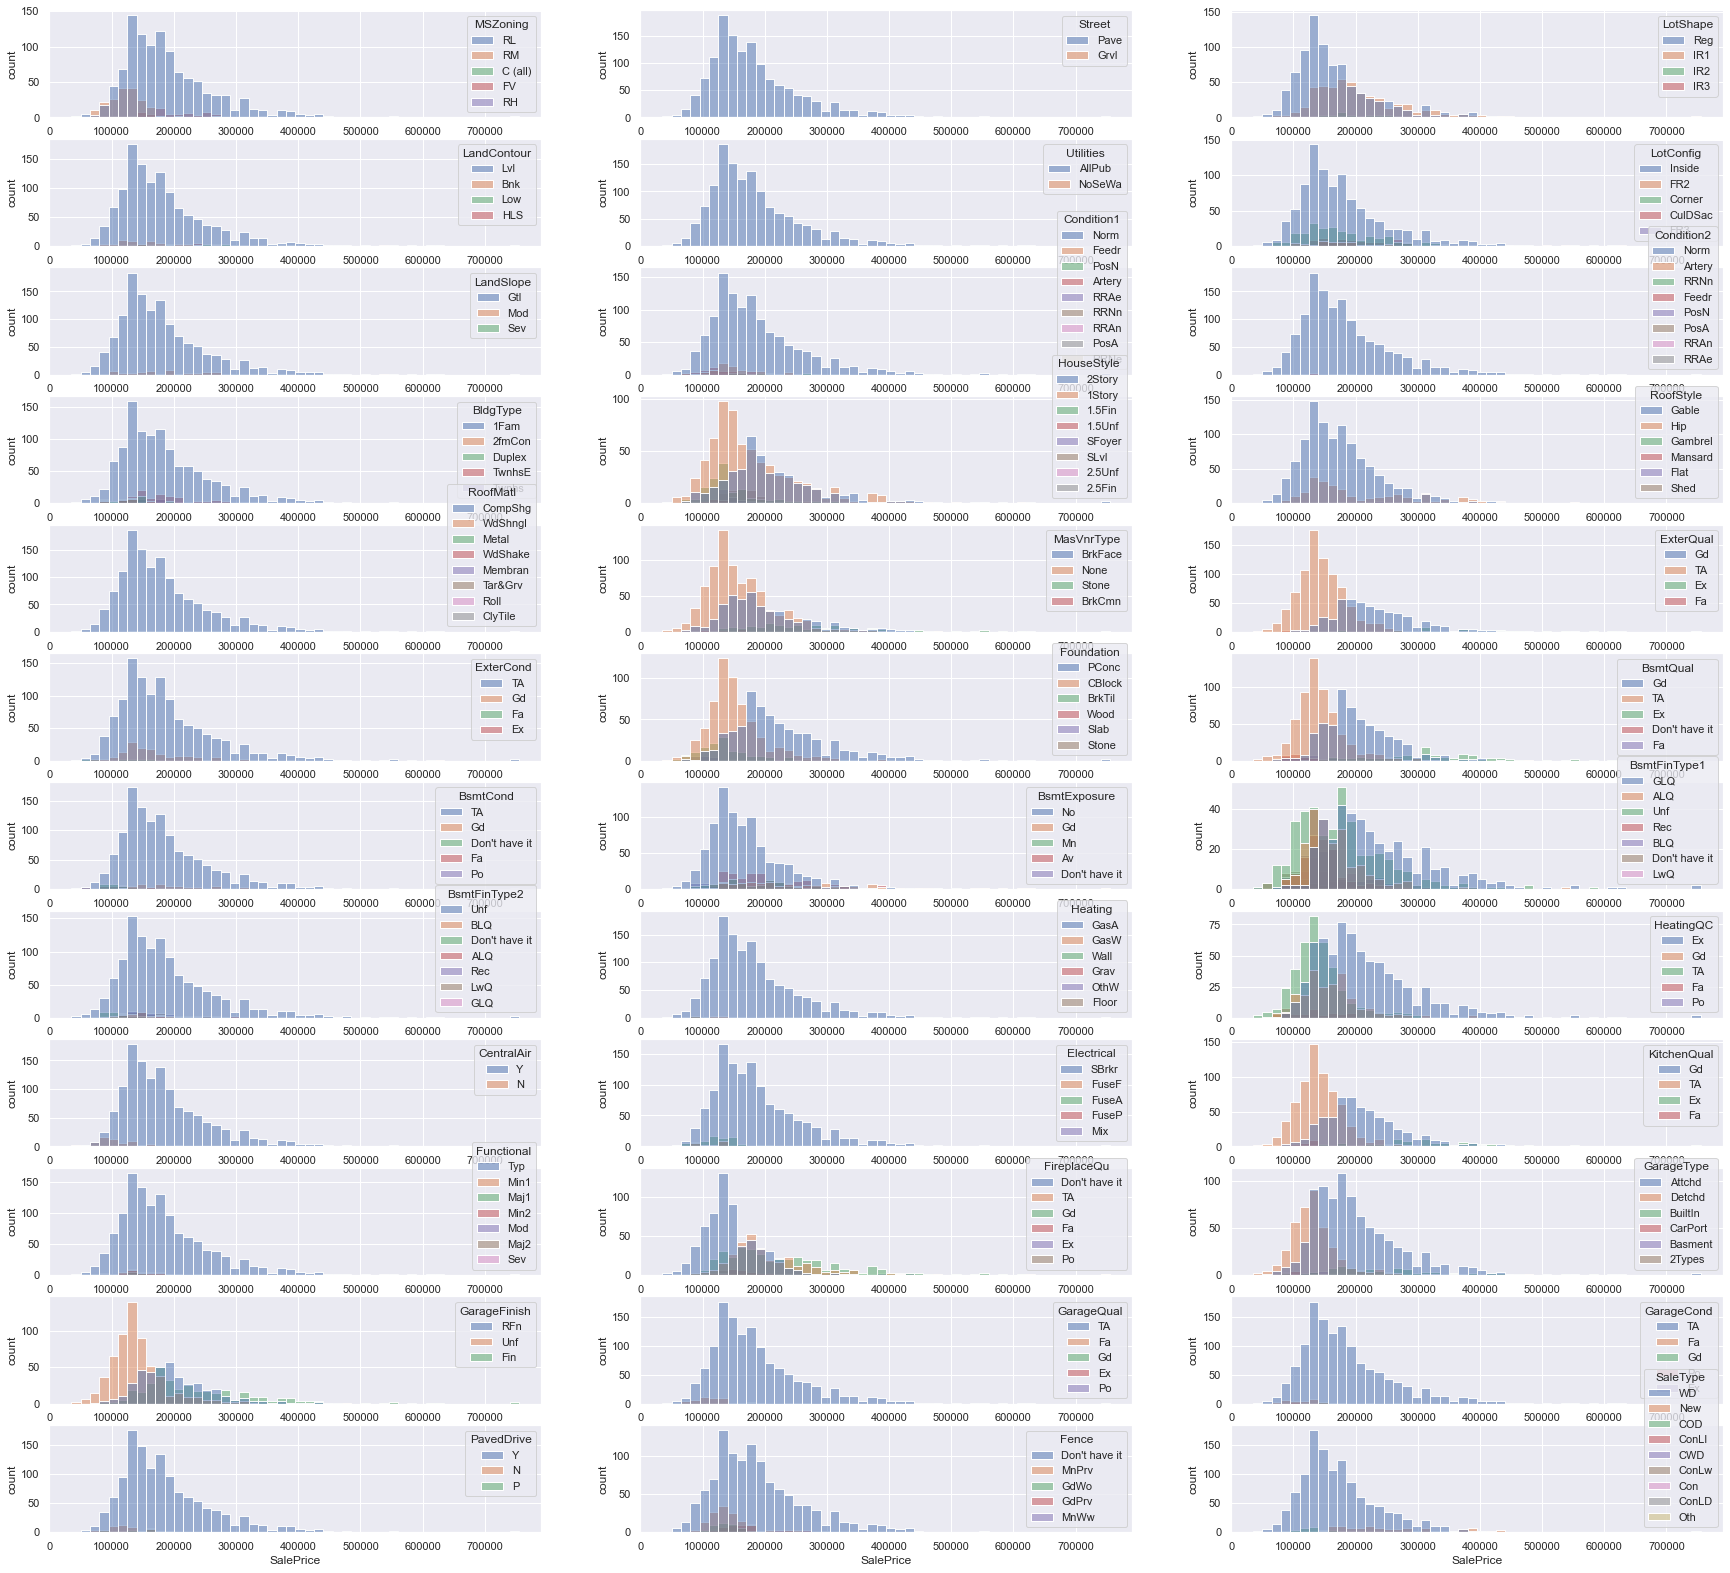

In [177]:
plot_hist_box(cols=object_cols,hue=True)

Pela análise gráfica as features que separam melhor o preço são:

- HouseStyle
- ExterQual
- Foundation
- BsmtQual
- BsmtFinType1
- HeatingQC
- KitchenQual
- FireplaceQu
- GarageFinish


In [178]:
#colunas categoricas que separam melhor o preço das casas
object_cols_sep = ['HouseStyle','ExterQual','Foundation','BsmtQual','BsmtFinType1','KitchenQual','FireplaceQu','GarageFinish','HeatingQC']

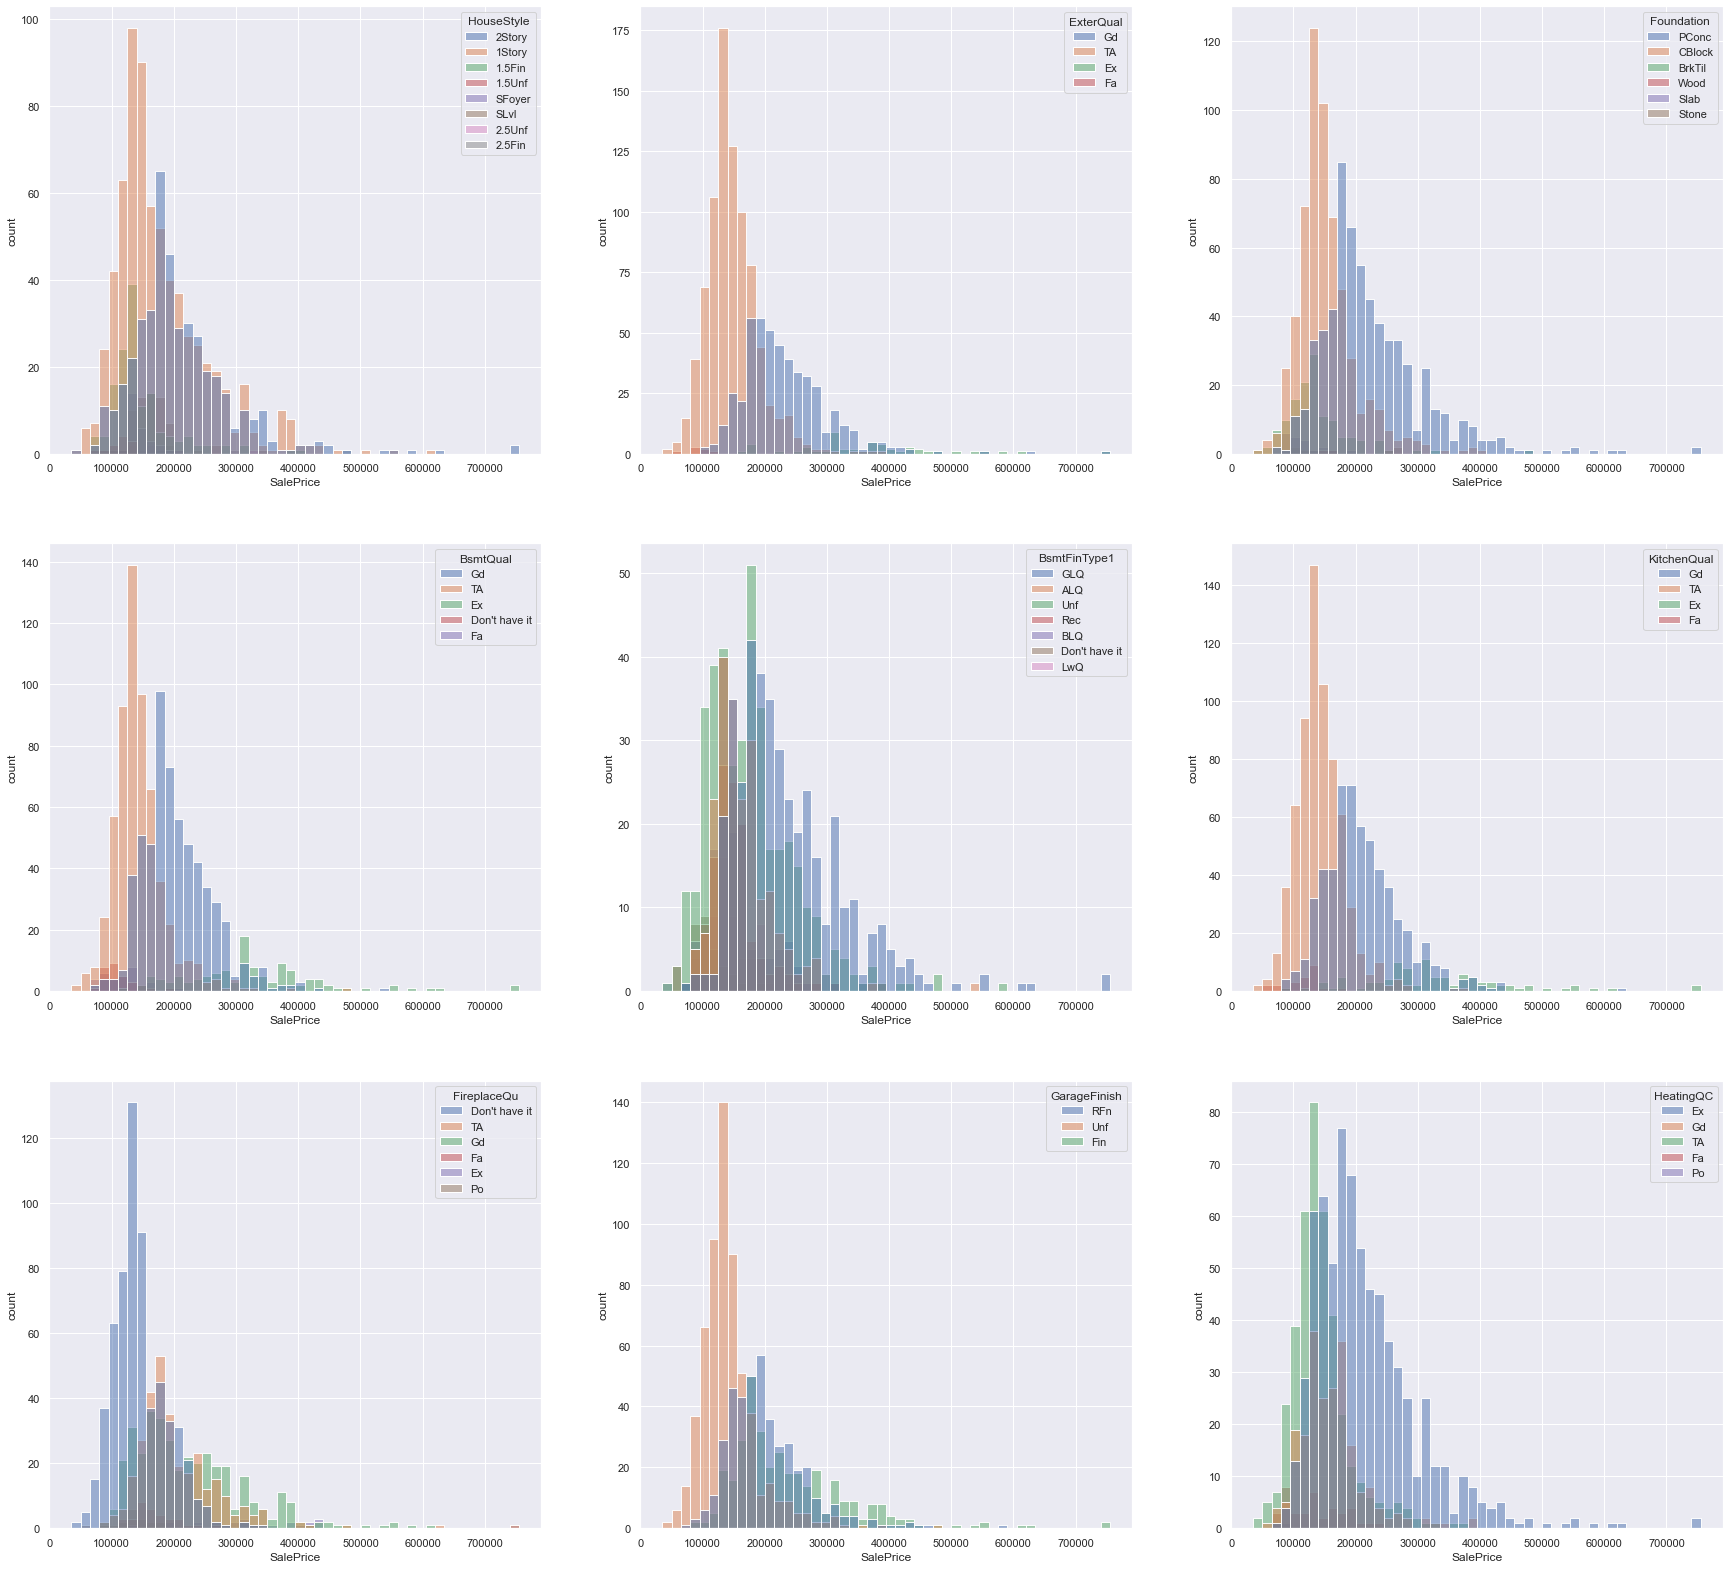

In [179]:
plot_hist_box(object_cols_sep,hue=True)

Algumas conclusões que percebemos a partir dos histogramas:
- Casas de 2 andares são vendidas mais caras
- Casas com bom exterior em qualidade boa ou excelente são vendidas mais caras
- Casas de concreto derramado na fundação são mais caras e casas com blocos de concreto na fundação são mais baratos
- Cozinha com qualidade excelente varizam bastante o preço da casa
- A maioria das casas não tem larreira
- Garagens não finalizadas reduzem bastante o preço da casa
- Qualidade de aquecimento mediana também prejudica bastante o preço de venda

Vamos ver como está o histograma de cada variável numérica

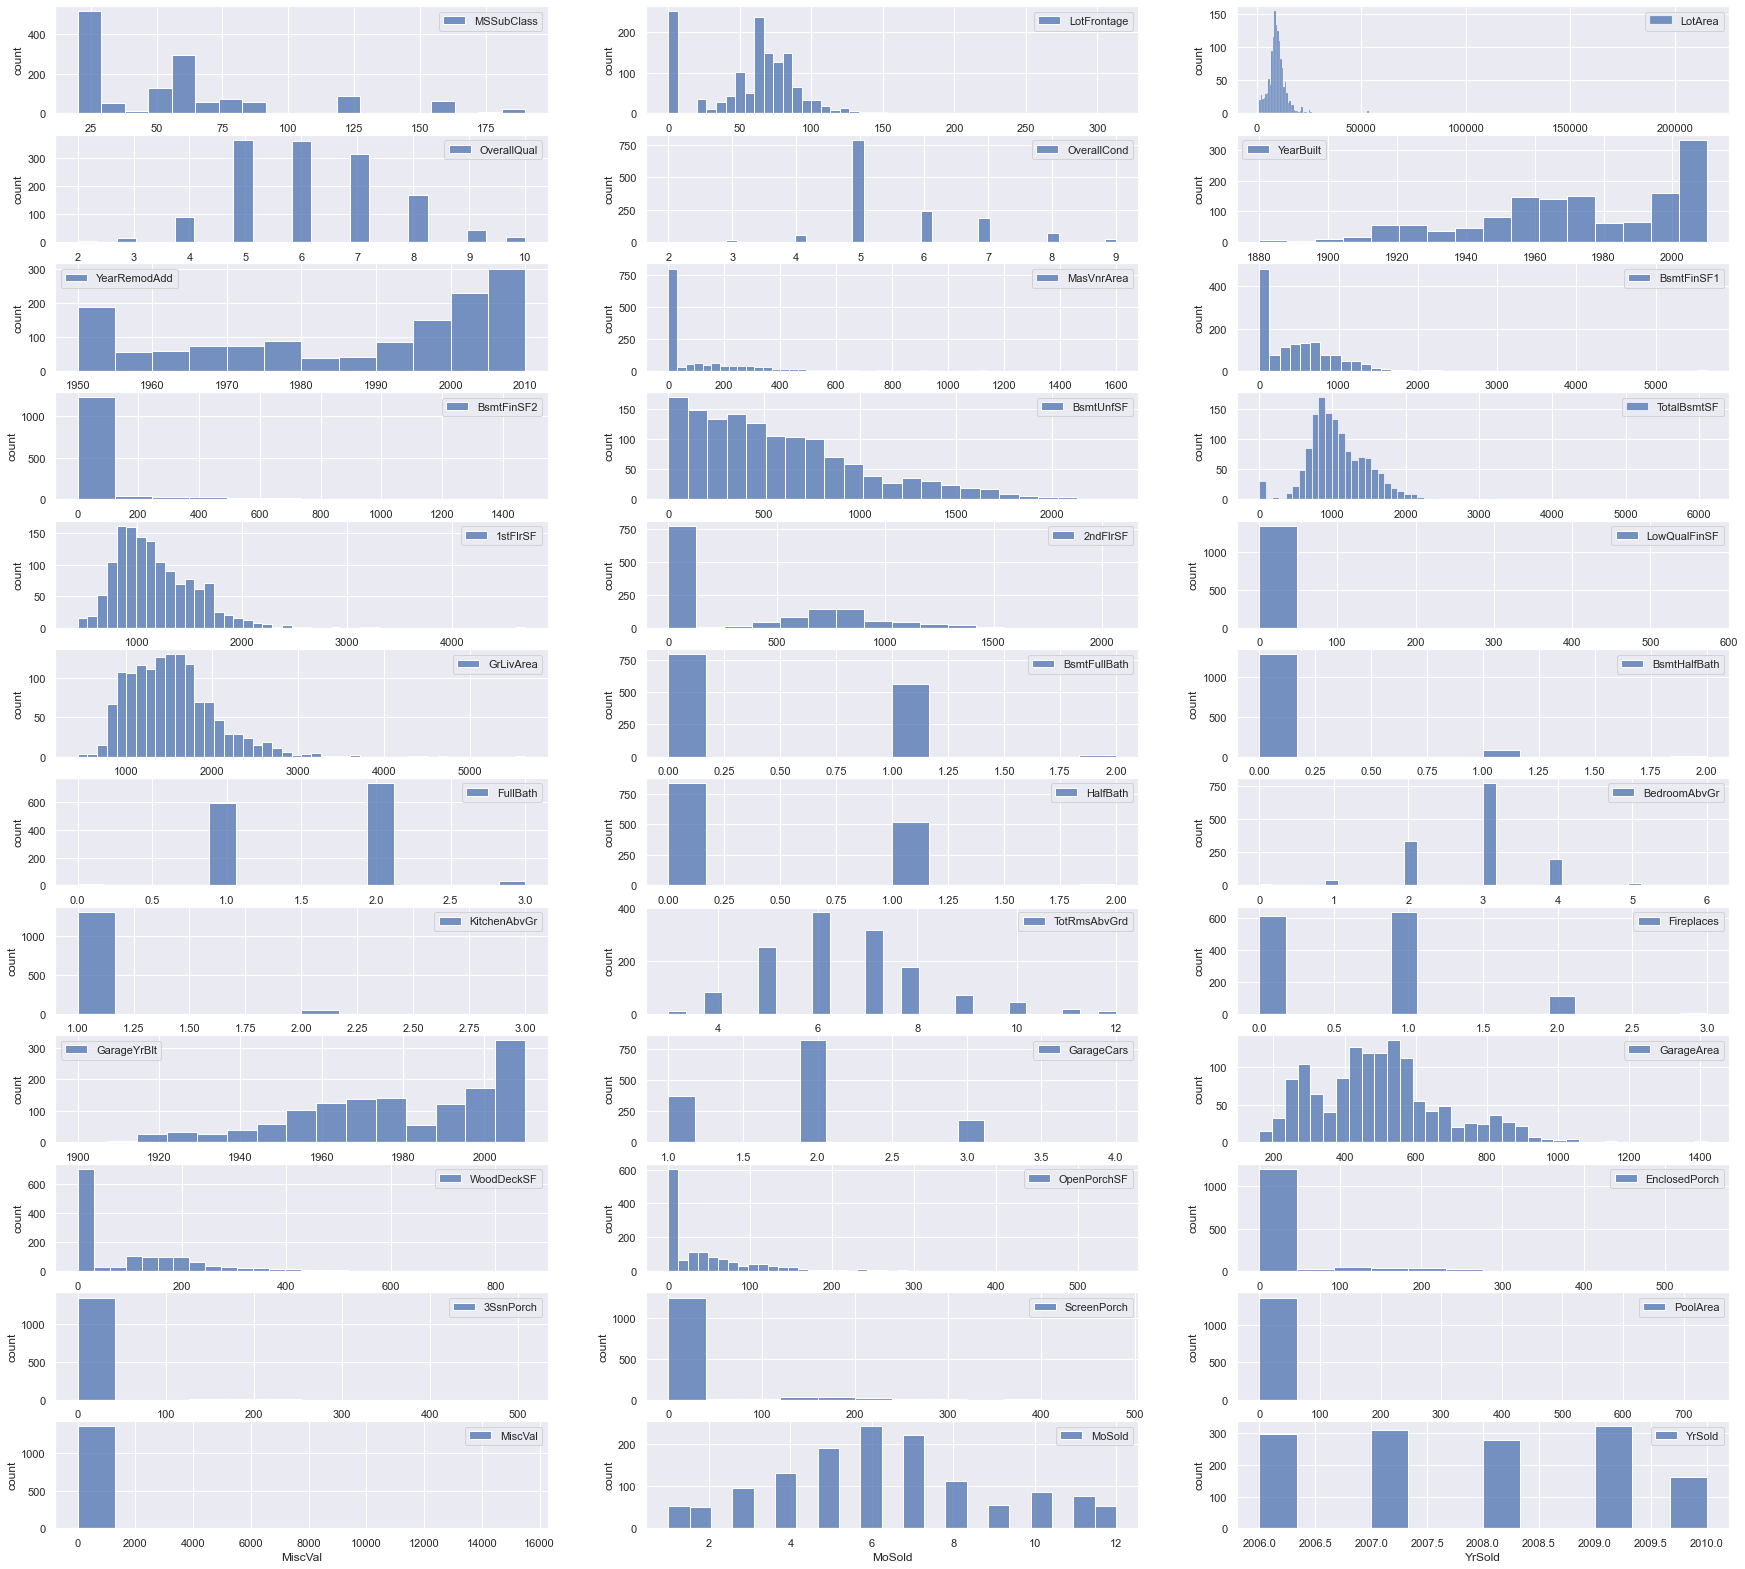

In [180]:
plot_hist_box(num_cols,hue=False)

Pelo gráfico acima vemos que existem várias variáveis contínuas e algumas discretas. Vamos separar para visualizar melhor os histogramas

In [181]:
dicio = {col: train_full[col].nunique() for col in num_cols}
print(sorted(dicio.items(),key=lambda x: x[1]))

#vamos fazer o corte em 24 valores únicos, tudo que tiver mais do que 20 valores únicos será considerada uma variável contínua


[('BsmtFullBath', 3), ('BsmtHalfBath', 3), ('HalfBath', 3), ('KitchenAbvGr', 3), ('FullBath', 4), ('Fireplaces', 4), ('GarageCars', 4), ('YrSold', 5), ('BedroomAbvGr', 7), ('OverallCond', 8), ('PoolArea', 8), ('OverallQual', 9), ('TotRmsAbvGrd', 10), ('MoSold', 12), ('MSSubClass', 15), ('LowQualFinSF', 17), ('3SsnPorch', 20), ('MiscVal', 20), ('YearRemodAdd', 61), ('ScreenPorch', 76), ('GarageYrBlt', 97), ('LotFrontage', 108), ('YearBuilt', 109), ('EnclosedPorch', 110), ('BsmtFinSF2', 142), ('OpenPorchSF', 197), ('WoodDeckSF', 267), ('MasVnrArea', 327), ('2ndFlrSF', 398), ('GarageArea', 437), ('BsmtFinSF1', 622), ('SalePrice', 634), ('TotalBsmtSF', 702), ('1stFlrSF', 733), ('BsmtUnfSF', 765), ('GrLivArea', 828), ('LotArea', 1013)]


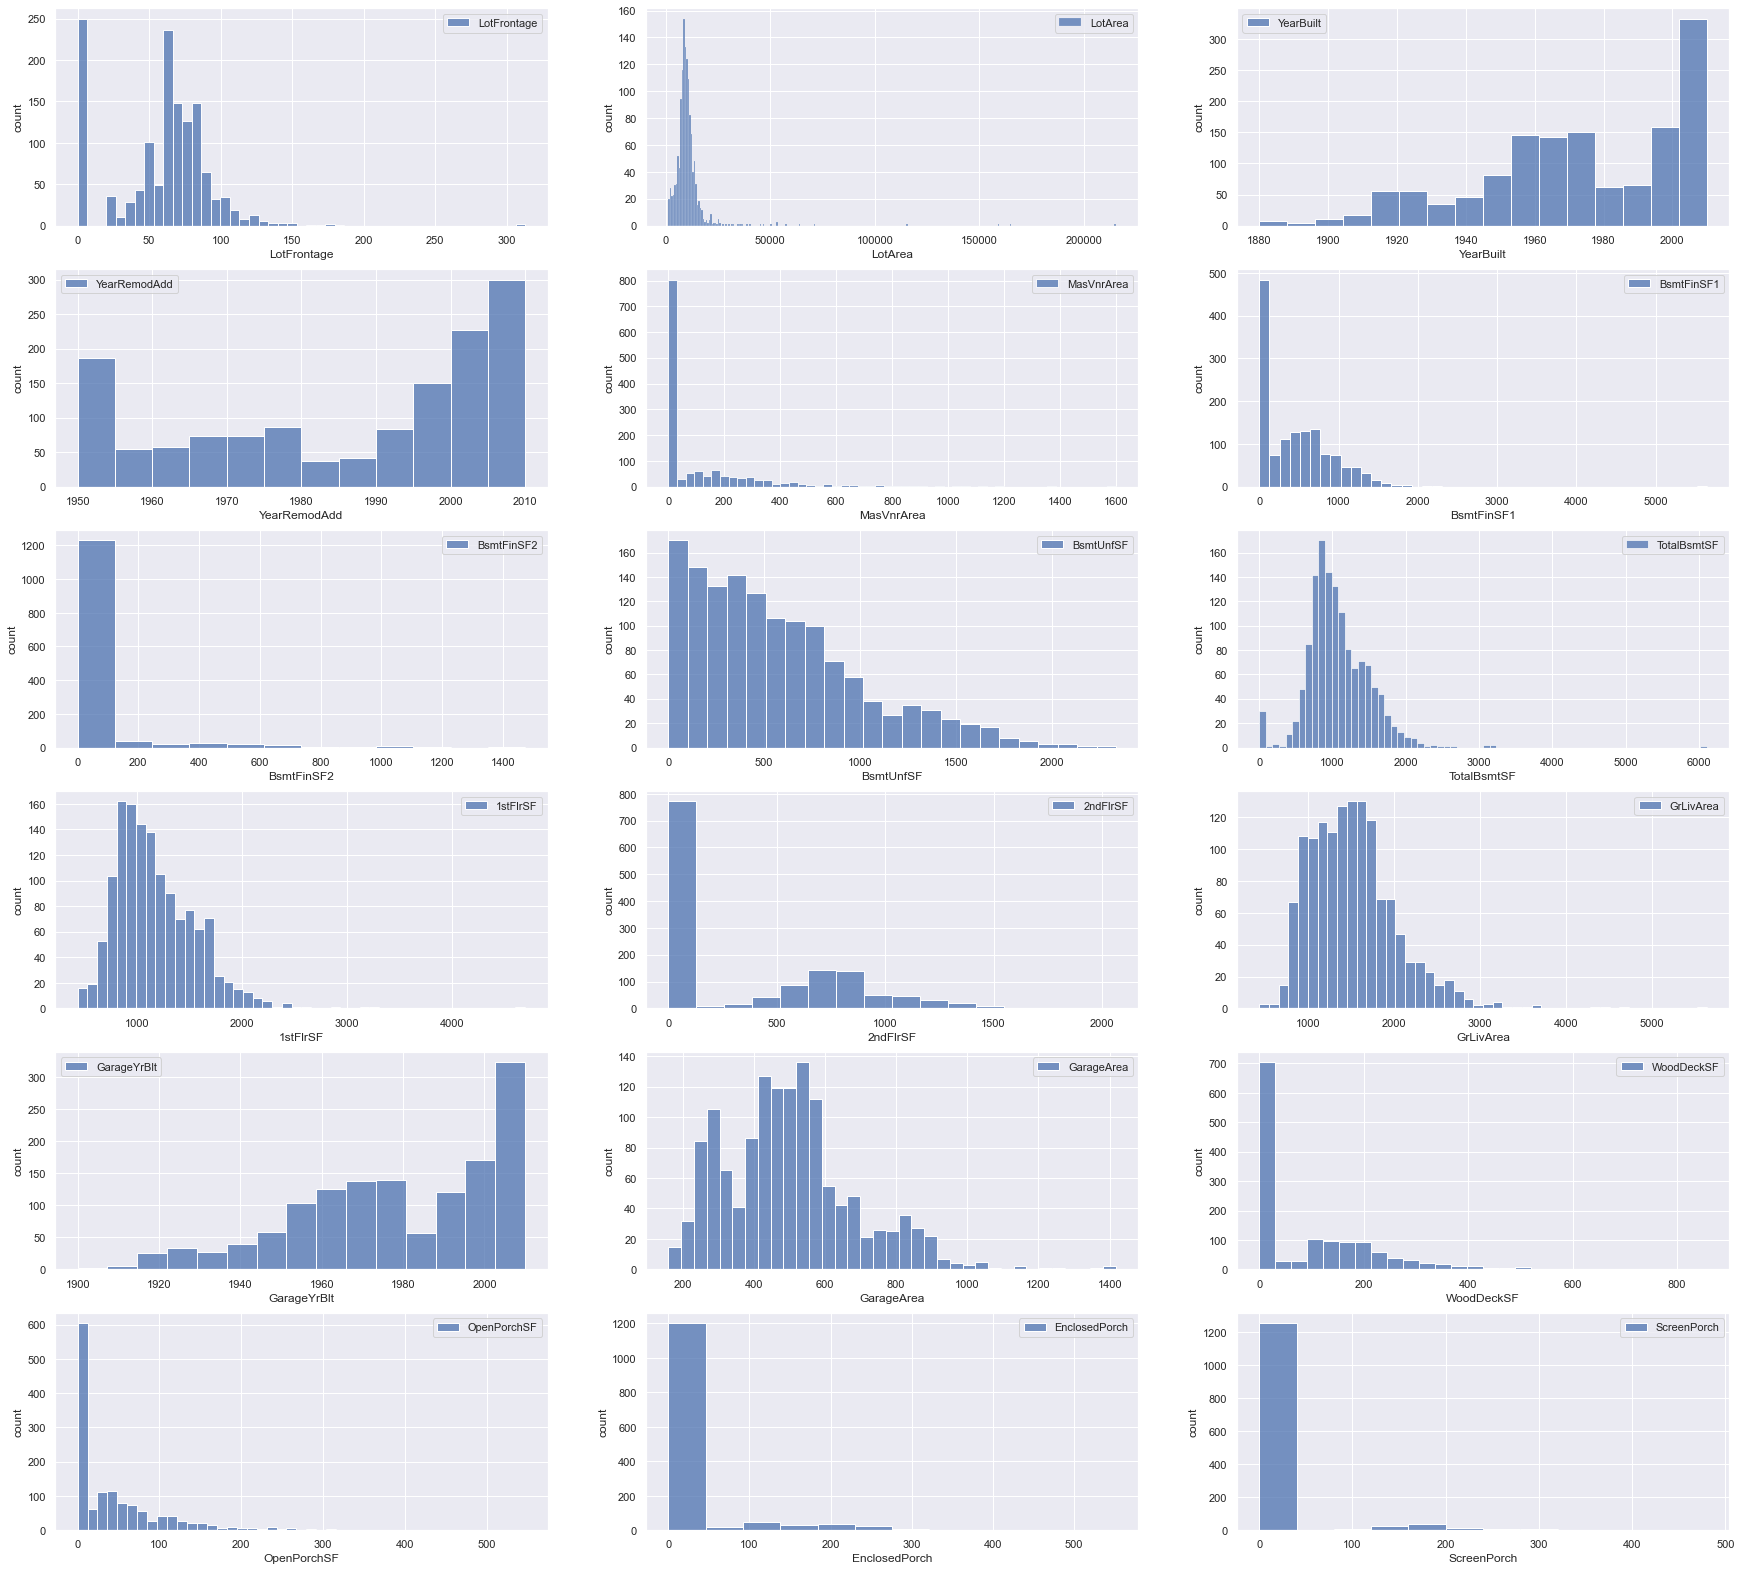

In [182]:
num_cols_discrete = [col for col in num_cols if train_full[col].nunique() <=20]
num_cols_contin = [col for col in num_cols if train_full[col].nunique() >20]

plot_hist_box(num_cols_contin)

vamos plotar o boxplot para comprovar se existem muitos outliers

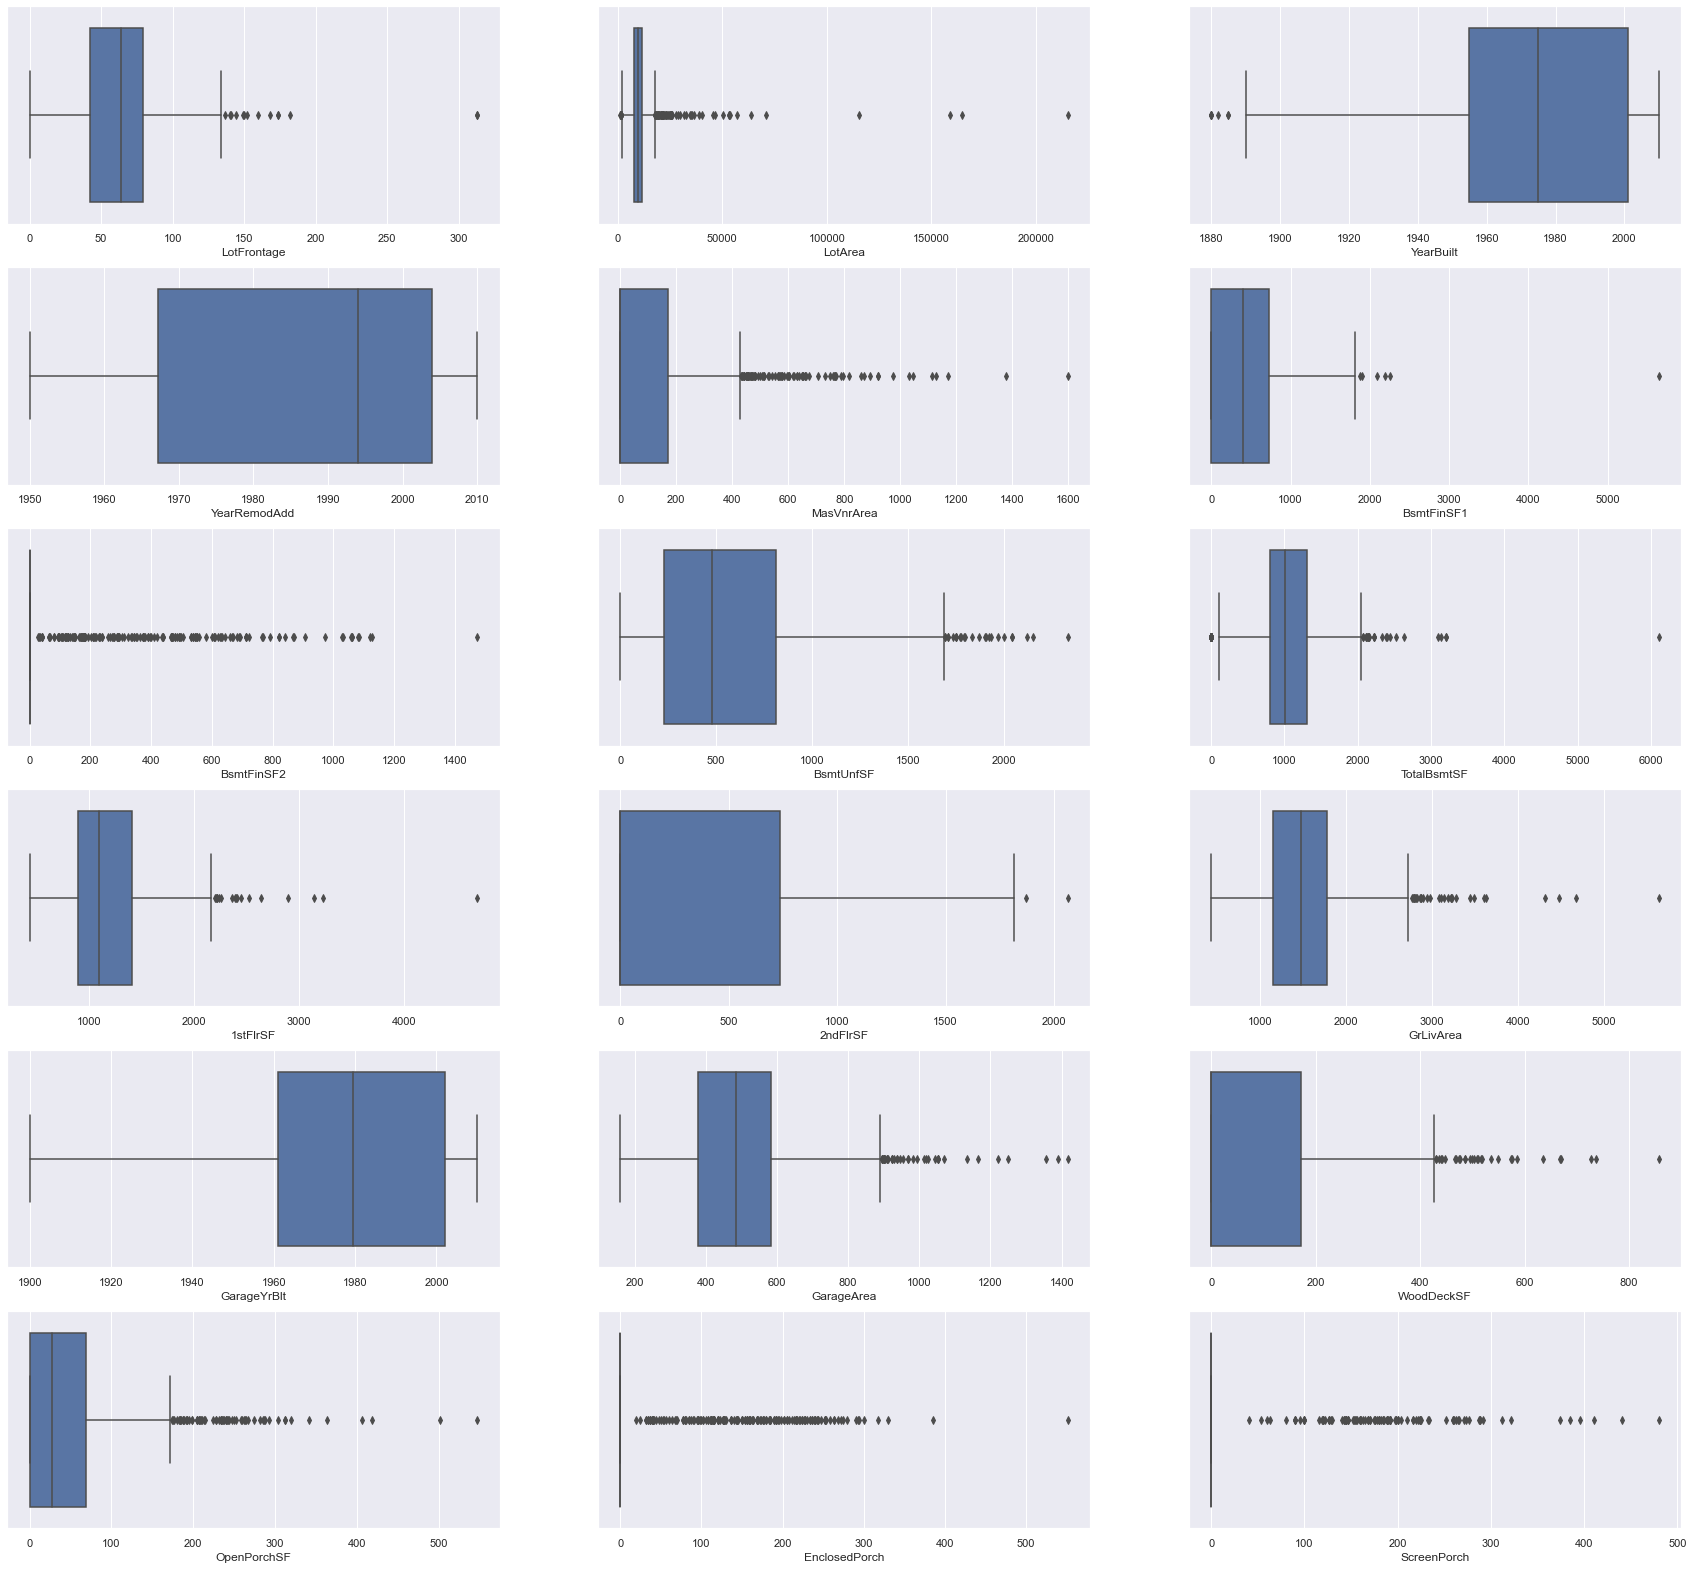

In [183]:
plot_hist_box(cols=num_cols_contin,graph='box')

O volume de outliers em algumas features é bem severo e exigirá transformações de colunas

In [184]:
train_full[num_cols_contin].skew()

LotFrontage       0.266955
LotArea          12.038631
YearBuilt        -0.654113
YearRemodAdd     -0.536562
MasVnrArea        2.591171
BsmtFinSF1        1.695994
BsmtFinSF2        4.178907
BsmtUnfSF         0.927640
TotalBsmtSF       1.634819
1stFlrSF          1.387298
2ndFlrSF          0.788780
GrLivArea         1.418451
GarageYrBlt      -0.642880
GarageArea        0.812339
WoodDeckSF        1.504358
OpenPorchSF       2.266285
EnclosedPorch     3.218412
ScreenPorch       3.971729
SalePrice         1.935370
dtype: float64

Tirando LotFrontage e GarageArea quase nenhuma coluna é normal

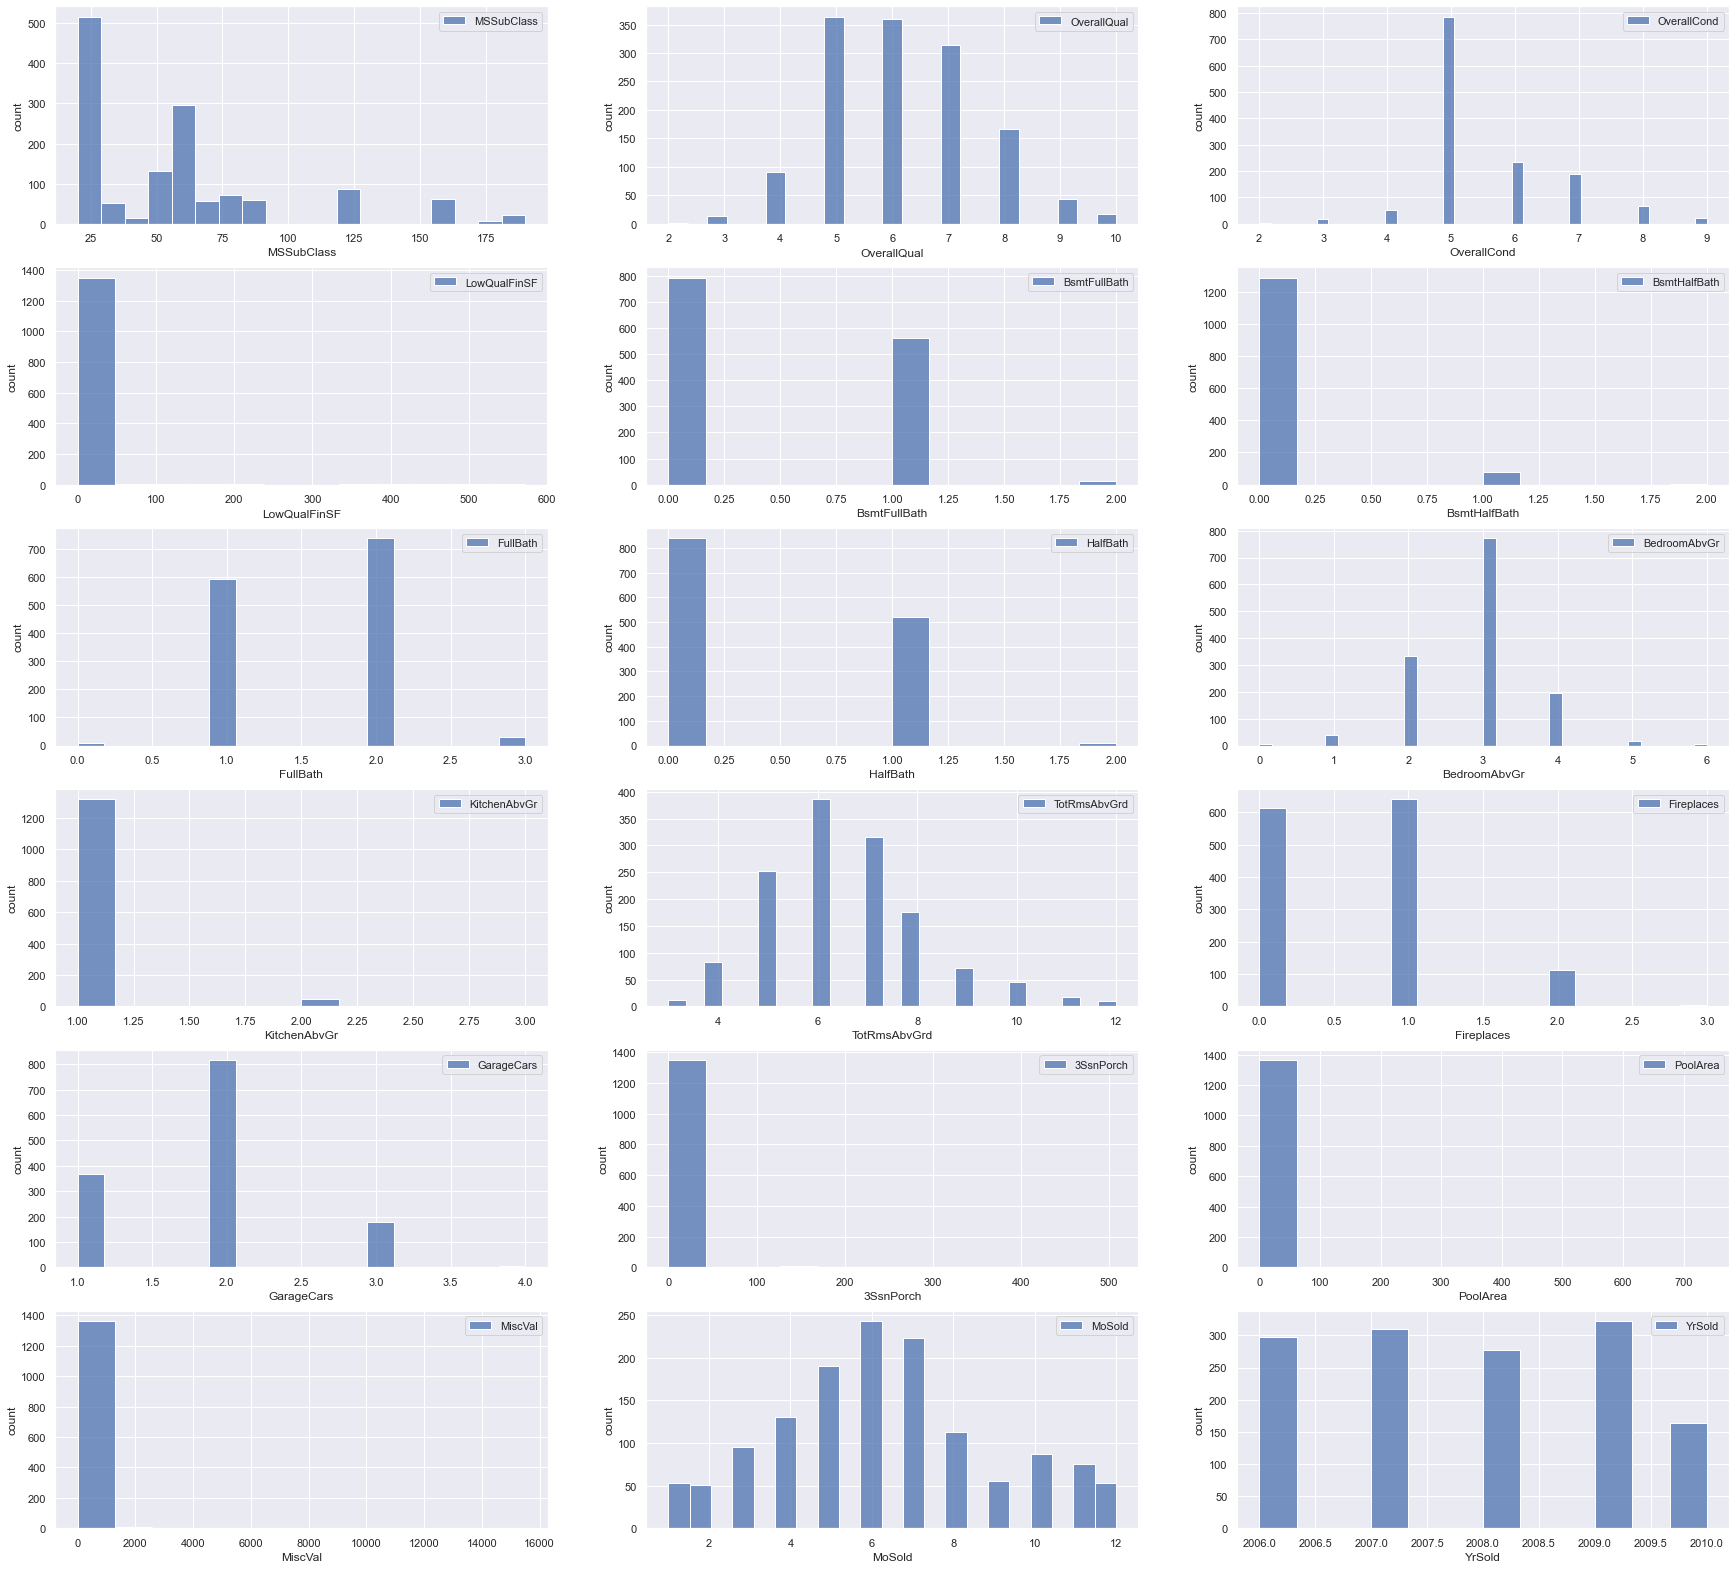

In [185]:
plot_hist_box(num_cols_discrete)

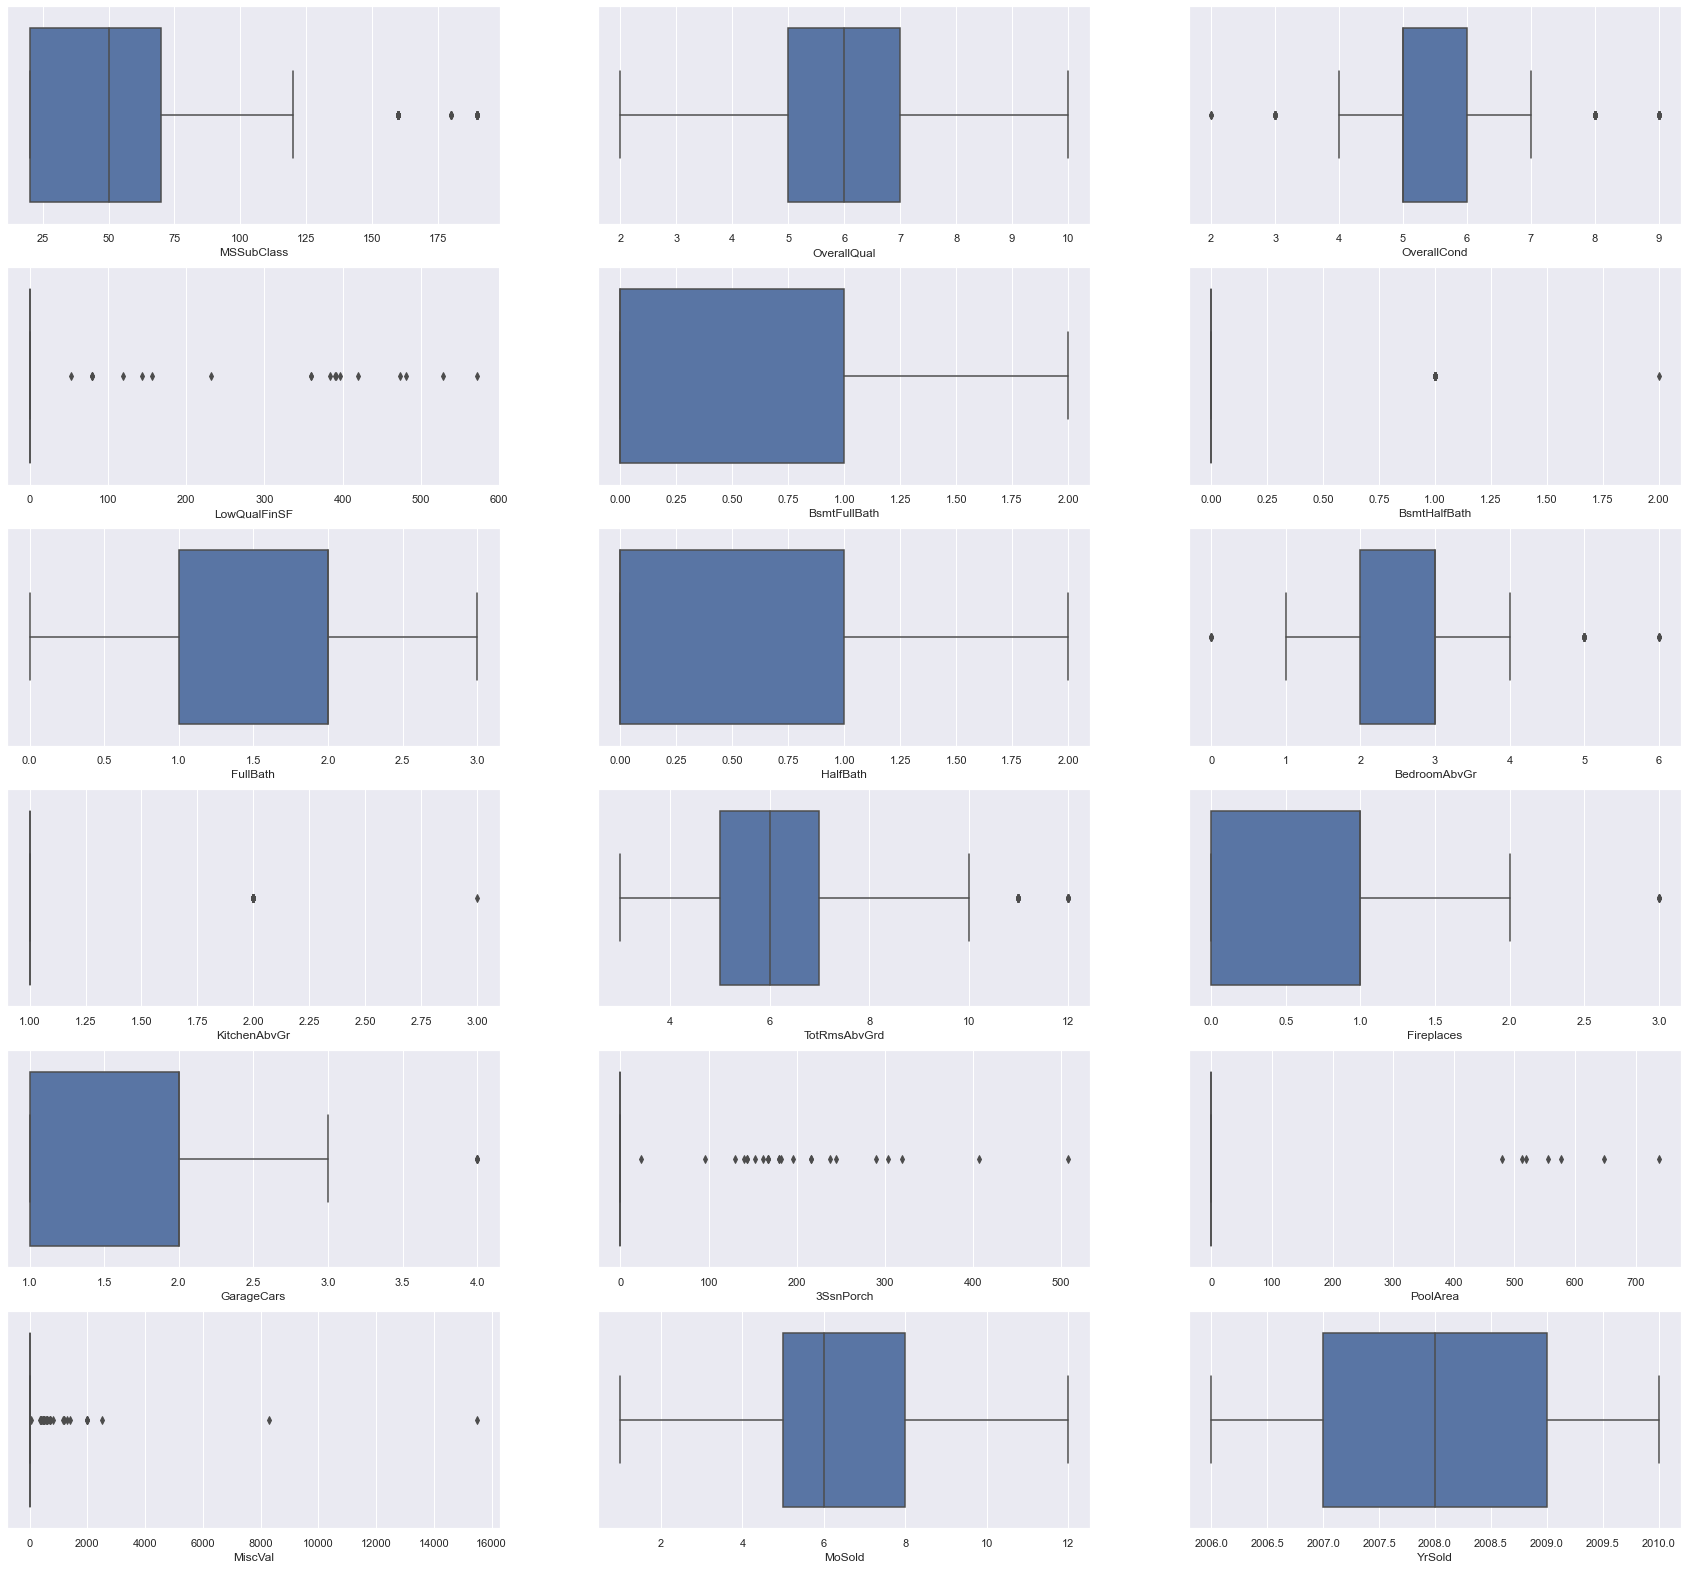

In [186]:
plot_hist_box(cols=num_cols_discrete,graph='box')

Pelas distribuições das variáveis numéricas é visível a presença de outliers e de não normalidade. Dessa forma, se farão necessárias transformações nas colunas de variáveis discretas também

In [187]:
train_full[num_cols_discrete].skew()

MSSubClass       1.380815
OverallQual      0.284285
OverallCond      0.869391
LowQualFinSF    10.676747
BsmtFullBath     0.495975
BsmtHalfBath     3.902393
FullBath        -0.015033
HalfBath         0.589219
BedroomAbvGr    -0.006881
KitchenAbvGr     5.134677
TotRmsAbvGrd     0.676565
Fireplaces       0.583846
GarageCars       0.197473
3SsnPorch        9.973544
PoolArea        14.358607
MiscVal         24.760097
MoSold           0.206516
YrSold           0.096837
dtype: float64

#### 1.9 Análise de correlação entre as features

Antes vamos verificar melhor a correlação entre as features para ver se podemos dropar alguma

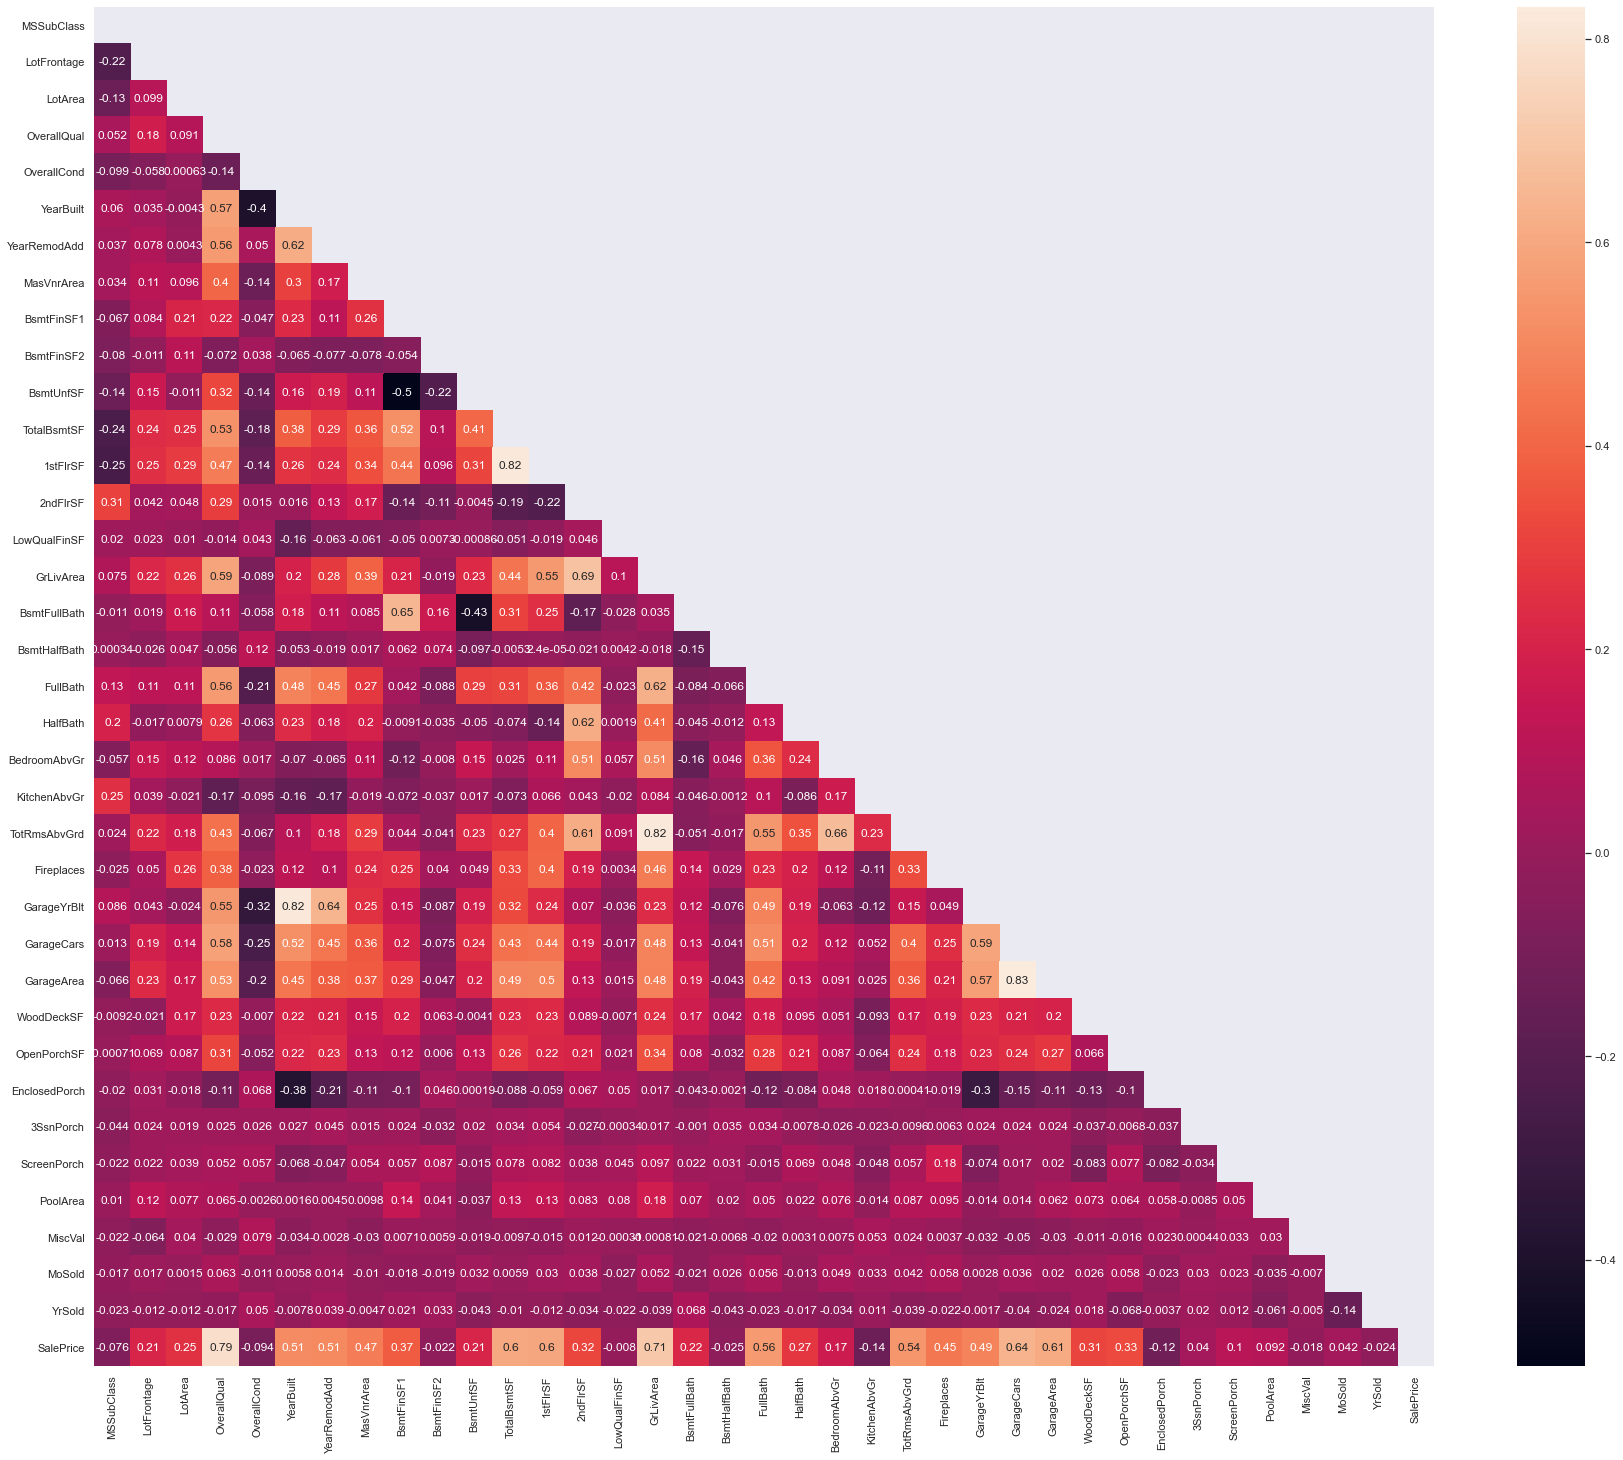

In [188]:
fig,ax = plt.subplots(1,1,figsize=(30,25))
mask = np.triu(train_full[num_cols].corr())
sns.heatmap(train_full[num_cols].corr(),mask=mask,annot=True);

As seguintes features tem uma elevada correlação e portanto são redundantes
- 'GrLivArea' e 'TotRmsAbvGrd' 
- 'TotalBsmtSF' e '1stFlrSF'
- 'Garage YrBlt' e 'YearBuilt'
- 'GarageArea' e 'GarageCars'

Dessa forma vamos dropar as seguintes features 'TotalBsmtSF','GrLivArea','YearBuilt','GarageCars'

In [189]:
num_cols = [col for col in num_cols if col not in ['TotalBsmtSF','GrLivArea','YearBuilt','GarageCars']]

O preço da casa tem elevada correção com a qualidade geral e com a área habitável, o que faz bastante sentido

# 2 Modelagem

#### 2.1 Dividindo a base de treino em base de treino e validação para realizar o holdout posteriormente

In [192]:
y = train_full.SalePrice

num_cols.remove('SalePrice')


my_cols = object_cols_sep + num_cols

X_train_full = train_full[my_cols]
X_test = test_full[my_cols]

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y, test_size=0.33, random_state=42)

#### 2.2 Separação das colunas em categórias, normais e alto skew (não normais)

Antes do pre processamento, vamos dividir as colunas numéricas em colunas com alta skew e colunas com skew tolerável (<0.75 ou >-0,75) que serão consideradas normais

In [212]:
mask_skew = abs(X_train_full[num_cols].skew())>0.75
num_cols_high_skwe = X_train_full[num_cols].skew()[mask_skew].index
num_cols_norm = X_train_full[num_cols].drop(columns=num_cols_high_skwe).columns

#### 2.3 Criando o transformador de coluna

Vamos montar as classes de pre processamento e usaremos as seguintes metodologias:
- Variáveis categórias: transformação em colunas de 0 e 1, onde droparemos a primeira coluna já que ela sempre será reduntante
- Variáveis numéricas baixo viés e que consideraremos normais: faremos apenas o scaling
- Variáveis numéricas com alto viés e não normais: tornaremos elas normais e faremos o scalling com a método de transformação por quantile

In [213]:
# Pre processamento de colunas categóricas
pre_object = OneHotEncoder(drop='first',handle_unknown="ignore")

#Pre processamento de colunas numéricas de alta skewness e normais


pre_num_high_skew = QuantileTransformer(n_quantiles=X_train.shape[0])
pre_num_norm = StandardScaler()

#Criando o pre processador para cada coluna
pre_processor = ColumnTransformer(transformers=[
    ('onehot',pre_object,object_cols_sep),
    ('scale',pre_num_norm,num_cols_norm),
    ('power',pre_num_high_skew,num_cols_high_skwe)
])

set_config(display='diagram')

pre_processor

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['HouseStyle', 'ExterQual', 'Foundation',
                                  'BsmtQual', 'BsmtFinType1', 'KitchenQual',
                                  'FireplaceQu', 'GarageFinish', 'HeatingQC']),
                                ('scale', StandardScaler(),
                                 Index(['LotFrontage', 'OverallQual', 'YearRemodAdd', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRm...
       'GarageYrBlt', 'MoSold', 'YrSold'],
      dtype='object')),
                                ('power', QuantileTransformer(n_quantiles=917),
                                 Index(['MSSubClass', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'BsmtHalfBath', 'KitchenAbvGr', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object'))])

#### 2.4 Treinando os modelos

Testaremos os seguintes modelos regressores:
- Regressão linear multipla
- Penalização Lasso, Ridge e Elasticnet
- RandomForest
- Regressões que usam o gradiente descendente

In [214]:
#Listas para armazenar o rsme, mae, r2
rsme = []
mae = []
r2 = []


models = [LinearRegression(),Lasso(random_state=43),Ridge(random_state=43),ElasticNet(random_state=43),RandomForestRegressor(random_state=43),XGBRegressor(random_state=43),AdaBoostRegressor(random_state=43),KNeighborsRegressor()]
models_name = ['Linear','Lasso','Ridge','Elasticnet','Randomforest','XGB','AdaBoost','KNeighbors']


for model,name in zip(models,models_name):
    my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),(f'{model}',model)])
    my_pipeline.fit(X_train,y_train);
    preds = my_pipeline.predict(X_valid)
    rsme.append(mean_squared_error(y_valid,preds,squared=False))
    mae.append(mean_absolute_error(y_valid,preds))
    r2.append(r2_score(y_valid,preds))

sumarry = pd.DataFrame({'Model':models_name,'RSME':rsme,'MAE':mae,'R2':r2})

sumarry

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Foun

,Model,RSME,MAE,R2
0,Linear,38415.409573,22628.225166,0.769741
1,Lasso,38455.910882,22668.520928,0.769255
2,Ridge,37640.112404,22493.952774,0.778941
3,Elasticnet,41716.048593,26477.248278,0.728474
4,Randomforest,31524.913773,19740.028764,0.844935
5,XGB,29822.999095,19796.109246,0.861226
6,AdaBoost,36336.163430,25654.292282,0.793992
7,KNeighbors,41250.455812,26069.019868,0.734501


#### 2.5 Repetindo o processo com validação cruzada

Vamos refazer o processo mas dessa vez realizando a validação cruzada antes de decidir qual é o melhor modelo e começar a fazer o tunning dos hiperparâmetros

In [215]:
# Pre processamento de colunas categóricas
pre_object = OneHotEncoder(drop='first',handle_unknown="ignore")

#Pre processamento de colunas numéricas de alta skewness e normais
pre_num_high_skew = QuantileTransformer(n_quantiles=X_train.shape[0])
pre_num_norm = StandardScaler()

#Criando o pre processador para cada coluna
pre_processor = ColumnTransformer(transformers=[
    ('onehot',pre_object,object_cols_sep),
    ('scale',pre_num_norm,num_cols_norm),
    ('power',pre_num_high_skew,num_cols_high_skwe)
])


#Listas para armazenar o rsme, mae, r2
rsme = []
mae = []
r2 = []

models = [LinearRegression(),Lasso(random_state=43),Ridge(random_state=43),ElasticNet(random_state=43),RandomForestRegressor(random_state=43),XGBRegressor(random_state=43),AdaBoostRegressor(random_state=43),KNeighborsRegressor()]
models_name = ['Linear','Lasso','Ridge','Elasticnet','Randomforest','XGB','AdaBoost','KNeighbors']

for model,name in zip(models,models_name):
    my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),(f'{model}',model)])
    scores = cross_validate(my_pipeline,X_train_full, y,scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','r2'],cv=5)
    rsme.append(scores['test_neg_root_mean_squared_error'].mean()*-1)
    mae.append(scores['test_neg_mean_absolute_error'].mean()*-1)
    r2.append(scores['test_r2'].mean())

sumarry_2 = pd.DataFrame({'Model':models_name,'RSME':rsme,'MAE':mae,'R2':r2})

sumarry_2


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+09, tolerance: 6.771e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as 

,Model,RSME,MAE,R2
0,Linear,34292.066172,21217.245255,0.808654
1,Lasso,34243.797211,21191.725763,0.809185
2,Ridge,34070.441706,21116.614448,0.811113
3,Elasticnet,39791.169440,24855.853127,0.743116
4,Randomforest,31483.863407,19029.278348,0.838903
5,XGB,31962.883473,19172.211020,0.833317
6,AdaBoost,37896.862435,25975.591471,0.765959
7,KNeighbors,39546.658734,24587.140876,0.744340


É possível perceber que o modelo Random Forest e o modelo XGB foram o que tiveram as melhores métricas e será com eles que faremos o tunning dos hiperparâmetros

#### 2.6 Tunning do modelo de Random Forest

Começaremos pelo tunning do modelo de RandomForest. Pela documentação do sklearn é possível perceber que os hiperametros de maior relevância são:

- n_estimators
- max_features
- max_depth
- min_samples_split
- min_samples_leaf
- bootstrap

Usaremos para cada uma, uma lista de valores e descobriremos um norte dos hiperâmetros com a class experimental do sklearn HalvingRandomSearchCV (bem mais rápida do que a RandomSearchCV)

In [45]:

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10,15,20,25]
min_samples_leaf = [1, 2, 4,8,16]
bootstrap = [True, False]
random_grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}

print(random_grid)


{'rf__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'rf__max_features': ['auto', 'sqrt'], 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'rf__min_samples_split': [2, 5, 10, 15, 20, 25], 'rf__min_samples_leaf': [1, 2, 4, 8, 16], 'rf__bootstrap': [True, False]}


In [53]:
#criando um novo objeto com o método para fazer o teste com os hiperametros
rf = RandomForestRegressor(random_state=43)

my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),('rf',rf)])

rf_random = HalvingRandomSearchCV(estimator = my_pipeline,
                                 param_distributions = random_grid, 
                                 cv = 5, verbose=False, 
                                 random_state=42, 
                                 n_jobs = -1,
                                 return_train_score=True)
# Fitando o modelo
rf_random.fit(X_train, y_train)



C:\Users\gabri\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         n

HalvingRandomSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(transformers=[('onehot',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  ['HouseStyle',
                                                                                   'ExterQual',
                                                                                   'Foundation',
                                                                                   'BsmtQual',
                                                                                   'BsmtFinType1',
                                                                                   'KitchenQual',
                                                                                   'FireplaceQu',
                                                                                   'GarageFinish',
                                                                                   'HeatingQC']),
                                                                                 ('scale',
                                                                                  StandardScaler(),
                                                                                  Index(['LotFrontage', 'OverallQual', 'YearRemo...
                                                 RandomForestRegressor(random_state=43))]),
                      n_jobs=-1,
                      param_distributions={'rf__bootstrap': [True, False],
                                           'rf__max_depth': [10, 20, 30, 40, 50,
                                                             60, 70, 80, 90,
                                                             100, 110, None],
                                           'rf__max_features': ['auto', 'sqrt'],
                                           'rf__min_samples_leaf': [1, 2, 4, 8,
                                                                    16],
                                           'rf__min_samples_split': [2, 5, 10,
                                                                     15, 20,
                                                                     25],
                                           'rf__n_estimators': [200, 400, 600,
                                                                800, 1000, 1200,
                                                                1400, 1600,
                                                                1800, 2000]},
                      random_state=42, verbose=False)

In [54]:
#dicionário com os melhores parâmetros
rf_random.best_params_

{'rf__n_estimators': 2000,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'sqrt',
 'rf__max_depth': 90,
 'rf__bootstrap': False}

In [216]:
#Criando um modelo com os melhores parâmetros
model =  RandomForestRegressor(random_state=43, n_estimators = 2000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 90,
 bootstrap= False)


my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),(f'{model}',model)])
scores = cross_validate(my_pipeline,X_train_full, y,scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','r2'],cv=5)

sumarry_2.loc[8,:] = 'RandomForest Tunning', scores['test_neg_root_mean_squared_error'].mean()*-1, scores['test_neg_mean_absolute_error'].mean()*-1,scores['test_r2'].mean()

sumarry_2



C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Model,RSME,MAE,R2
0,Linear,34292.066172,21217.245255,0.808654
1,Lasso,34243.797211,21191.725763,0.809185
2,Ridge,34070.441706,21116.614448,0.811113
3,Elasticnet,39791.169440,24855.853127,0.743116
4,Randomforest,31483.863407,19029.278348,0.838903
5,XGB,31962.883473,19172.211020,0.833317
6,AdaBoost,37896.862435,25975.591471,0.765959
7,KNeighbors,39546.658734,24587.140876,0.744340
8,RandomForest Tunning,30408.801632,17888.823232,0.850387


Agora que temos um norte dos melhores valores para os hiperparâmetros podemos usar o método do HalvingGridSearchCV (muito mais rápido que o GridSearchCV) para testar todas as combinações possíveis

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 1900, stop = 2200, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(80, 110, num = 4)]
max_depth.append(None)
min_samples_split = [2,3]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

grid = {'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap}

#criando um novo objeto com o método para fazer o teste com os hiperametros
rf = RandomForestRegressor(random_state=43)

my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),('rf',rf)])

rf_grid = HalvingGridSearchCV(estimator = my_pipeline, param_grid = grid, cv = 5, random_state=42, n_jobs = -1,verbose=True)

# Fitando o modelo
rf_grid.fit(X_train, y_train)

In [57]:
rf_random.best_params_

{'rf__n_estimators': 2000,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'sqrt',
 'rf__max_depth': 90,
 'rf__bootstrap': False}

Os melhores parametros foram os mesmos que o método HalvingRandomSearchCV descobriu

In [217]:
#Criando um modelo com os melhores parâmetros
model =  RandomForestRegressor(random_state=43, n_estimators = 2000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 90,
 bootstrap= False)


my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),(f'{model}',model)])
scores = cross_validate(my_pipeline,X_train_full, y,scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','r2'],cv=5)

sumarry_2.loc[8,:] = 'RandomForest Tunning', scores['test_neg_root_mean_squared_error'].mean()*-1, scores['test_neg_mean_absolute_error'].mean()*-1,scores['test_r2'].mean()

sumarry_2

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Model,RSME,MAE,R2
0,Linear,34292.066172,21217.245255,0.808654
1,Lasso,34243.797211,21191.725763,0.809185
2,Ridge,34070.441706,21116.614448,0.811113
3,Elasticnet,39791.169440,24855.853127,0.743116
4,Randomforest,31483.863407,19029.278348,0.838903
5,XGB,31962.883473,19172.211020,0.833317
6,AdaBoost,37896.862435,25975.591471,0.765959
7,KNeighbors,39546.658734,24587.140876,0.744340
8,RandomForest Tunning,30408.801632,17888.823232,0.850387


Tivemos uma melhora de 2 pontos percentuais no R2 do modelo após o tunning

#### 2.7 Tunning do modelo de XGB Regressor

Agora vamos realizar o tunning do modelo XGBRegressor. Pela documentação é possível perceber que alguns hiperametros de grande relevância são:

[Link documentação](https://xgboost.readthedocs.io/en/stable/parameter.html)

- reg_lambda
- reg_alpha
- n_estimators
- min_child_weigth
- max_depth
- learning_rate
- gamma
- colsample_bytree

Usaremos para cada uma, uma lista de valores e descobriremos um norte dos hiperâmetros com a class experimental do sklearn HalvingRandomSearchCV (bem mais rápida do que a RandomSearchCV)

In [ ]:
xgb_random_grid = {"xgb__learning_rate"    : [i for i in np.arange(0.05,0.8,0.05)] ,
 "xgb__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "xgb__min_child_weight" : [ 1, 3, 5, 7 ],
 "xgb__gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "xgb__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 'xgb__n_estimators': [n for n in range(100,2000,100)],
 'xgb__reg_alpha':[1,2,3,4,5,6,7,8],
 'xgb__reg_lambda':[1,2,3,4,5,6,7,8]}
 
print(xgb_random_grid)

#criando um novo objeto com o método para fazer o teste com os hiperametros
xgb = XGBRegressor(random_state=43)

my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),('xgb',xgb)])


xgb_random = HalvingRandomSearchCV(estimator = my_pipeline,
                                 param_distributions = xgb_random_grid, 
                                 cv = 5, verbose=False, 
                                 random_state=42, 
                                 n_jobs = -1,)
# Fitando o modelo
xgb_random.fit(X_train, y_train)

{'xgb__learning_rate': [0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.3, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.6500000000000001, 0.7000000000000001, 0.7500000000000001], 'xgb__max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'xgb__min_child_weight': [1, 3, 5, 7], 'xgb__gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'xgb__colsample_bytree': [0.3, 0.4, 0.5, 0.7], 'xgb__n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900], 'xgb__reg_alpha': [1, 2, 3, 4, 5, 6, 7, 8], 'xgb__reg_lambda': [1, 2, 3, 4, 5, 6, 7, 8]}


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan]
  warnings.warn(
C:\Users\gabri\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan   

HalvingRandomSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                                 ColumnTransformer(transformers=[('onehot',
                                                                                  OneHotEncoder(drop='first',
                                                                                                handle_unknown='ignore'),
                                                                                  ['HouseStyle',
                                                                                   'ExterQual',
                                                                                   'Foundation',
                                                                                   'BsmtQual',
                                                                                   'BsmtFinType1',
                                                                                   'KitchenQual',
                                                                                   'FireplaceQu',
                                                                                   'GarageFinish',
                                                                                   'HeatingQC']),
                                                                                 ('scale',
                                                                                  StandardScaler(),
                                                                                  Index(['LotFrontage', 'OverallQual', 'YearRemo...
                                                                  0.6000000000000001,
                                                                  0.6500000000000001,
                                                                  0.7000000000000001,
                                                                  0.7500000000000001],
                                           'xgb__max_depth': [3, 4, 5, 6, 8, 10,
                                                              12, 15],
                                           'xgb__min_child_weight': [1, 3, 5,
                                                                     7],
                                           'xgb__n_estimators': [100, 200, 300,
                                                                 400, 500, 600,
                                                                 700, 800, 900,
                                                                 1000, 1100,
                                                                 1200, 1300,
                                                                 1400, 1500,
                                                                 1600, 1700,
                                                                 1800, 1900],
                                           'xgb__reg_alpha': [1, 2, 3, 4, 5, 6,
                                                              7, 8],
                                           'xgb__reg_lambda': [1, 2, 3, 4, 5, 6,
                                                               7, 8]},
                      random_state=42, verbose=False)

In [181]:
xgb_random.best_params_

{'xgb__reg_lambda': 7,
 'xgb__reg_alpha': 3,
 'xgb__n_estimators': 1300,
 'xgb__min_child_weight': 3,
 'xgb__max_depth': 15,
 'xgb__learning_rate': 0.05,
 'xgb__gamma': 0.2,
 'xgb__colsample_bytree': 0.7}

In [218]:
#Criando um modelo com os melhores parâmetros
model =  XGBRegressor(random_state=43, reg_lambda= 7,
 reg_alpha= 3,
 n_estimators= 1300,
 min_child_weight= 3,
 max_depth= 15,
 learning_rate= 0.05,
 gamma= 0.2,
 colsample_bytree= 0.7)


my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),(f'{model}',model)])
scores = cross_validate(my_pipeline,X_train_full, y,scoring=['neg_root_mean_squared_error','neg_mean_absolute_error','r2'],cv=5)

sumarry_2.loc[9,:] = 'XGB Tunning', scores['test_neg_root_mean_squared_error'].mean()*-1, scores['test_neg_mean_absolute_error'].mean()*-1,scores['test_r2'].mean()

sumarry_2


C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Model,RSME,MAE,R2
0,Linear,34292.066172,21217.245255,0.808654
1,Lasso,34243.797211,21191.725763,0.809185
2,Ridge,34070.441706,21116.614448,0.811113
3,Elasticnet,39791.169440,24855.853127,0.743116
4,Randomforest,31483.863407,19029.278348,0.838903
5,XGB,31962.883473,19172.211020,0.833317
6,AdaBoost,37896.862435,25975.591471,0.765959
7,KNeighbors,39546.658734,24587.140876,0.744340
8,RandomForest Tunning,30408.801632,17888.823232,0.850387
9,XGB Tunning,30632.237645,18273.112651,0.848139


#### 2.8 Feature importance

O melhor modelo foi o Random Forest após o tunning, vamos olhar melhor a importância de cada feature para o modelo

In [219]:
model =  RandomForestRegressor(random_state=43, n_estimators = 2000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 90,
 bootstrap= False)


my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),(f'{model}',model)])
my_pipeline.fit(X_train,y_train);
preds = my_pipeline.predict(X_valid)

C:\Users\gabri\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


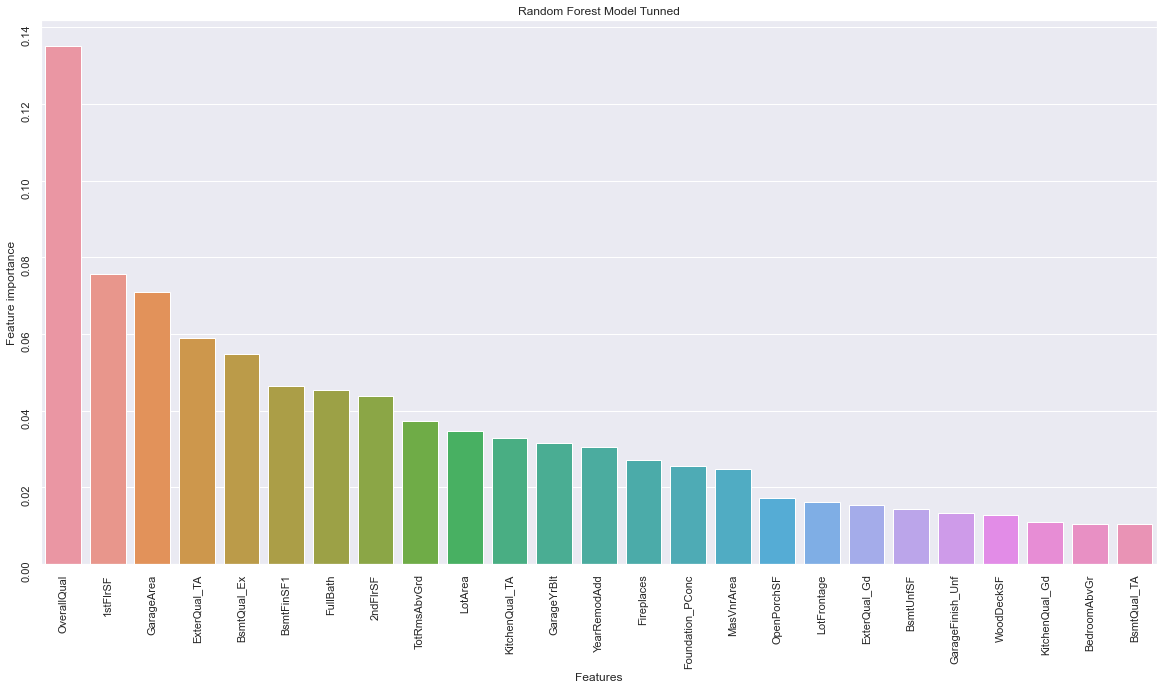

In [220]:
words = np.char.split(my_pipeline[:-1].get_feature_names_out().astype(str),sep='__')
words_seps = [[word for word in lista if word not in ('power','scale','onehot') ] for lista in words]
words_finally = [words[0] for words in words_seps]

feature_importance = pd.DataFrame({'Features':words_finally,'Importance':np.abs(my_pipeline.steps[1][1].feature_importances_)}).sort_values(by='Importance',ascending=False)
mask = feature_importance['Importance'] >= 0.01

plt.figure(figsize=(20,10))
plot = sns.barplot(data=feature_importance[mask],x='Features',y='Importance')
plot.set_xlabel('Features')
plot.set_ylabel('Feature importance')
plot.set_title('Random Forest Model Tunned')
plot.tick_params(labelrotation=90)

Vemos que as 5 features mais determinantes para o preço, foram:
- Qualidade geral
- Tamanho do primeiro andar
- Tamanho da garagem
- Qualidade do material do Exterior
- Qualidade do porão

O que faz sentido já que são qualidades mais macro dos imóveis e que provavelmente serão avaliados por a maioria dos compradores

<AxesSubplot:title={'center':'XGBBoost Regression'}, xlabel='y_Predicts', ylabel='y_True'>

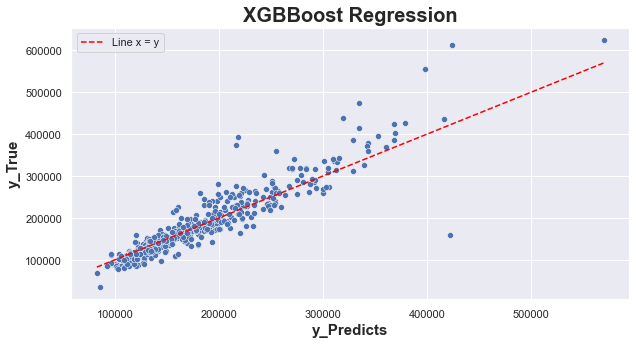

In [221]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(x=preds,y=y_valid,ci=0.95,ax=ax)
ax.set_xlabel('y_Predicts',fontweight='bold',size=15)
ax.set_ylabel('y_True',fontweight='bold',size=15)
ax.set_title('XGBBoost Regression',fontweight='bold',size=20)
sns.lineplot(x=preds,y=preds,color='red',ls='--',label='Line x = y')

Podemos perceber que as predições são mais assertivas para valores menores de preço das casas. Provavelmente limpando melhor os outliers o modelo seria mais assertivo

#### 2.8 Treinando o modelo com a base de treino total e gerando o arquivo de predição

In [273]:
#Como para submter no kaggle é necessário que o arquivo de precições tenha o mesmo numero de linhas da base de test e no começo do notebook nós dropamos missings da base de treino aqui vamos lê-la novamente e usar uma estratégia de preenchimento pela moda


test_full = pd.read_csv('test.csv',index_col=0)
inputer = SimpleImputer(strategy='most_frequent')
test_final = inputer.fit_transform(test_full)
X_test = pd.DataFrame(test_final,columns=test_full.columns)[my_cols]

In [274]:

# Pre processamento de colunas categóricas
pre_object = OneHotEncoder(drop='first',handle_unknown="ignore")

#Pre processamento de colunas numéricas de alta skewness e normais
pre_num_high_skew = QuantileTransformer()
pre_num_norm = StandardScaler()

#Criando o pre processador para cada coluna
pre_processor = ColumnTransformer(transformers=[
    ('onehot',pre_object,object_cols_sep),
    ('scale',pre_num_norm,num_cols_norm),
    ('power',pre_num_high_skew,num_cols_high_skwe)
])


model =  RandomForestRegressor(random_state=43, n_estimators = 2000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 90,
 bootstrap= False)


my_pipeline = Pipeline(steps=[('preprocessor',pre_processor),(f'{model}',model)])
my_pipeline.fit(X_train_full,y);
preds = my_pipeline.predict(X_test)


In [279]:
submission_index = pd.read_csv('sample_submission.csv')
submit = pd.DataFrame({'SalePrice':preds,'Id':submission_index['Id']})
submit.to_csv('preds',index=False)

--------------------